In [1]:
import pyforest
import json
from pandas import json_normalize
from my_module import *

from lazypredict.Supervised import LazyRegressor

from sklearn.preprocessing import PowerTransformer

pd.set_option('display.max_columns', 200)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# pd.set_option('display.max_colwidth', 50)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\matgi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\matgi\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df2015 = pd.read_csv("data/2015-building-energy-benchmarking.csv")
df2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.00,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,65.00,78.90,80.30,173.50,175.10,6981428.00,7097539.00,2023032.00,1080307.00,3686160.00,12724.00,1272388.00,0.00,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.00,NaN,31.00,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.00,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,51.00,94.40,99.00,191.30,195.20,8354235.00,8765788.00,0.00,1144563.00,3905411.00,44490.00,4448985.00,0.00,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.00,NaN,31.00,18081


In [3]:
with open('data/socrata_metadata_2015-building-energy-benchmarking.json') as f:
    metadata_2015 = json.load(f)
# json_normalize(metadata_2015)

In [4]:
df2016 = pd.read_csv("data/2016-building-energy-benchmarking.csv")
df2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00,0659000030,7,DOWNTOWN,47.61,-122.34,1927,1.00,12,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,60.00,81.70,84.30,182.50,189.00,7226362.50,7456910.00,2003882.00,1156514.25,3946027.00,12764.53,1276453.00,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00,0659000220,7,DOWNTOWN,47.61,-122.33,1996,1.00,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,61.00,94.80,97.90,176.10,179.40,8387933.00,8664479.00,0.00,950425.19,3242851.00,51450.82,5145082.00,False,NaN,Compliant,NaN,295.86,2.86


In [5]:
with open('data/socrata_metadata_2016-building-energy-benchmarking.json') as f:
    metadata_2016 = json.load(f)
# json_normalize(metadata_2016)

# Uniformisation des 2 df

In [6]:
# Split de la variable Location
df2015['Location'] = df2015['Location'].map(eval)
df_temp = df2015['Location'].apply(pd.Series)
df2015 = df2015.join(df_temp)
del df2015["Location"]

In [7]:
df2015['human_address'] = df2015['human_address'].map(eval)
df_temp = df2015['human_address'].apply(pd.Series)
df2015 = df2015.join(df_temp)
del df2015["human_address"]

In [8]:
set(df2015.columns) - set(df2016.columns)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'address',
 'city',
 'latitude',
 'longitude',
 'state',
 'zip'}

In [9]:
set(df2016.columns) - set(df2015.columns)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [10]:
df2015['2010 Census Tracts'].unique()

array([ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119.,
       118., 122., 125.])

In [11]:
# Sub_map reference not useful - doublon ZipCodes
df2015.drop(['2010 Census Tracts', 'Zip Codes'], axis=1, inplace=True)

In [12]:
df2015["GHGEmissionsIntensity(kgCO2e/ft2)"].describe()

count   3330.00
mean       0.99
std        1.64
min        0.00
25%        0.08
50%        0.46
75%        1.18
max       31.38
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [13]:
df2016["GHGEmissionsIntensity"].describe()

count   3367.00
mean       1.18
std        1.82
min       -0.02
25%        0.21
50%        0.61
75%        1.37
max       34.09
Name: GHGEmissionsIntensity, dtype: float64

In [14]:
df2015["GHGEmissions(MetricTonsCO2e)"].describe()

count    3330.00
mean      110.09
std       409.45
min         0.00
25%         9.27
50%        32.74
75%        88.64
max     11824.89
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [15]:
df2016["TotalGHGEmissions"].describe()

count    3367.00
mean      119.72
std       538.83
min        -0.80
25%         9.50
50%        33.92
75%        93.94
max     16870.98
Name: TotalGHGEmissions, dtype: float64

**Equivalence checked on https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy**

In [16]:
# Rename 2015 columns
df2015.rename(
    columns={
        "Comment": "Comments",
        "city": "City",
        "address": "Address",
        "latitude": "Latitude",
        "longitude": "Longitude",
        "state": "State",
        "zip": "ZipCode",
        "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity",
        "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions"
    },
    inplace=True,
)

In [17]:
# Drop now - other solution?
df2015.drop(
    columns=[
        "City Council Districts",
        "OtherFuelUse(kBtu)",
        "SPD Beats",
        "Seattle Police Department Micro Community Policing Plan Areas",
    ],
    inplace=True,
)

In [18]:
df2015 = df2015.reindex(columns=df2016.columns)

In [19]:
df = pd.concat([df2015, df2016])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   Address                          6716 non-null   object 
 6   City                             6716 non-null   object 
 7   State                            6716 non-null   object 
 8   ZipCode                          6700 non-null   object 
 9   TaxParcelIdentificationNumber    6714 non-null   object 
 10  CouncilDistrictCode              6716 non-null   int64  
 11  Neighborhood                     6716 non-null   object 
 12  Latitude            

# Nettoyage

In [21]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.00,12.00,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,65.00,78.90,80.30,173.50,175.10,6981428.00,7097539.00,2023032.00,1080307.00,3686160.00,12724.00,1272388.00,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.00,11.00,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,51.00,94.40,99.00,191.30,195.20,8354235.00,8765788.00,0.00,1144563.00,3905411.00,44490.00,4448985.00,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.00,41.00,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.00,Parking,100000.00,Swimming Pool,0.00,NaN,18.00,96.60,99.70,242.70,246.50,73130656.00,75506272.00,19660404.00,14583930.00,49762435.00,37099.00,3709900.00,Yes,NaN,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,DOWNTOWN,47.61421585,-122.33660889,1926,1.00,10.00,61320,0,61320,Hotel,Hotel,61320.00,NaN,NaN,NaN,NaN,NaN,1.00,460.40,462.50,636.30,643.20,28229320.00,28363444.00,23458518.00,811521.00,2769023.00,20019.00,2001894.00,No,NaN,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,DOWNTOWN,47.6137544,-122.3409238,1980,1.00,18.00,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,NaN,67.00,120.10,122.10,228.80,227.10,14829099.00,15078243.00,0.00,1777841.00,6066245.00,87631.00,8763105.00,No,NaN,Compliant,NaN,507.70,4.02


In [22]:
df_BAK = df.copy()

In [23]:
# Unuseful variables
df.drop(
    columns=[
        "PrimaryPropertyType", # redundant with LargestPropertyUseType
        "PropertyName",
        "Address",
        "City",
        "State",
        "ZipCode", # longitude and latitude can geolocalize the building
        "TaxParcelIdentificationNumber", # Unique value as OSEBuildingID
        "CouncilDistrictCode", # = Neighborhood (keep Neighborhood for OneHotEncoding)
        "ListOfAllPropertyUseTypes", # redundant with 1st, 2nd... use
        "SiteEUI(kBtu/sf)",
        "SiteEUIWN(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "SourceEUIWN(kBtu/sf)",
        "SiteEnergyUse(kBtu)", # SiteEnergyUseWN(kBtu) = 1st target
        "GHGEmissionsIntensity", # TotalGHGEmissions = 2nd target
        "Electricity(kWh)",
        "NaturalGas(therms)", # kBtu indicator used
        "Comments", # irrelevant
        "ComplianceStatus", # No significative value
        "DefaultData", # No significative value
    ], inplace=True
)

# Gestion des Nan

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   Neighborhood                     6716 non-null   object 
 4   Latitude                         6716 non-null   object 
 5   Longitude                        6716 non-null   object 
 6   YearBuilt                        6716 non-null   int64  
 7   NumberofBuildings                6708 non-null   float64
 8   NumberofFloors                   6708 non-null   float64
 9   PropertyGFATotal                 6716 non-null   int64  
 10  PropertyGFAParking               6716 non-null   int64  
 11  PropertyGFABuilding(s)           6716 non-null   int64  
 12  LargestPropertyUseTy

In [25]:
df[df["NumberofBuildings"].isna()]

,OSEBuildingID,DataYear,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
578,773,2016,NonResidential,DOWNTOWN,47.60,-122.33,1924,NaN,4.00,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,19798,2016,Multifamily LR (1-4),NORTHEAST,47.68,-122.26,1977,NaN,3.00,33166,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,23355,2016,Multifamily LR (1-4),SOUTHWEST,47.55,-122.39,1992,NaN,4.00,29357,0,29357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593798.62,NaN,NaN,NaN,NaN,NaN
1792,23437,2016,Multifamily LR (1-4),MAGNOLIA / QUEEN ANNE,47.62,-122.36,1957,NaN,4.00,23636,0,23636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,25431,2016,Multifamily LR (1-4),NORTHEAST,47.67,-122.31,1963,NaN,4.00,28472,0,28472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,797507.00,NaN,NaN,NaN,NaN,NaN
2474,25752,2016,Multifamily LR (1-4),NORTHWEST,47.70,-122.34,1989,NaN,4.00,29562,8531,21031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,25763,2016,Multifamily LR (1-4),SOUTHWEST,47.59,-122.39,1969,NaN,3.00,30420,0,30420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1126781.75,NaN,NaN,NaN,NaN,NaN
2670,26532,2016,NonResidential,NORTHEAST,47.66,-122.31,1928,NaN,2.00,20760,0,20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# No use defined fot these 8 buildings -- drop
df = df[~df["NumberofBuildings"].isna()]

In [27]:
df[df["NumberofFloors"].isna()]

,OSEBuildingID,DataYear,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
2015,24086,2015,Campus,GREATER DUWAMISH,47.59113039,-122.3233985,1991,10.00,NaN,180796,0,180796,Other,230970.00,Parking,0.00,NaN,NaN,NaN,NaN,33884892.00,0.00,16720050.00,13219839.00,NaN,818.66
3171,40028,2015,NonResidential,NORTHEAST,47.68384449,-122.26175956,1940,1.00,NaN,384772,0,384772,Non-Refrigerated Warehouse,349953.00,Office,63872.00,NaN,NaN,NaN,65.00,16729664.00,0.00,8925337.00,6486866.00,NaN,406.74
3172,40031,2015,NonResidential,NORTHEAST,47.68219493,-122.26238988,1960,1.00,NaN,30287,0,30287,Medical Office,31843.00,NaN,NaN,NaN,NaN,NaN,56.00,2085495.00,0.00,1671219.00,305497.00,NaN,27.88
3173,40034,2015,NonResidential,NORTHEAST,47.68219493,-122.26294644,1960,1.00,NaN,21931,0,21931,Medical Office,28000.00,NaN,NaN,NaN,NaN,NaN,21.00,4422217.00,0.00,1313104.00,2419089.00,NaN,137.63
3193,43948,2015,Nonresidential COS,GREATER DUWAMISH,47.56158829,-122.31607056,1906,1.00,NaN,39212,0,39212,Other,39212.00,NaN,NaN,NaN,NaN,NaN,NaN,773013.00,0.00,773045.00,0.00,NaN,5.39
3209,49705,2015,Nonresidential COS,NORTHEAST,47.68317875,-122.2587951,1929,7.00,NaN,502030,0,502030,Other - Recreation,564258.00,NaN,NaN,NaN,NaN,NaN,NaN,20657716.00,0.00,9661544.00,7629673.00,NaN,472.56
3311,49958,2015,Nonresidential COS,GREATER DUWAMISH,47.59524558,-122.3229473,2014,1.00,NaN,20993,0,20993,"Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.00,NaN,NaN,NaN,NaN,NaN,NaN,998308.00,0.00,784351.00,128239.00,NaN,12.28
3313,49966,2015,NonResidential,SOUTHEAST,47.54102707,-122.31249237,2009,1.00,NaN,40265,0,40265,Pre-school/Daycare,40265.00,NaN,NaN,NaN,NaN,NaN,NaN,2176523.00,0.00,1334228.00,623184.00,NaN,42.40


In [28]:
# Ground floor (1) by default
df["NumberofFloors"].fillna(1, inplace=True)

In [29]:
# LargestPropertyUseType is an important variable -- dropna
df.dropna(subset="LargestPropertyUseType", inplace=True)

In [30]:
# No 2nd, 3rd.. use mean no more distinct use
dictNA = {
    "SecondLargestPropertyUseType": "None",
    "ThirdLargestPropertyUseType": "None",
    "SecondLargestPropertyUseTypeGFA": 0,
    "ThirdLargestPropertyUseTypeGFA": 0,
}
df.fillna(dictNA, inplace=True)

In [31]:
# To many NaN values for YearsENERGYSTARCertified -- drop
del df["YearsENERGYSTARCertified"]

In [32]:
df["Outlier"].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [33]:
# Let's assume that Nan means "normal"
# Rename the values
df["Outlier"].fillna("Normal", inplace=True)
df["Outlier"].replace({"High Outlier": "High outlier", "Low Outlier": "Low outlier"}, inplace=True)

In [34]:
# Drop Nan value of the 1st target SiteEnergyUseWN(kBtu)
df.dropna(subset="SiteEnergyUseWN(kBtu)", inplace=True)

In [35]:
# ENERGYSTARScore will be test further
df_EStar = df.dropna().copy()
df.drop("ENERGYSTARScore", axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6552 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6552 non-null   int64  
 1   DataYear                         6552 non-null   int64  
 2   BuildingType                     6552 non-null   object 
 3   Neighborhood                     6552 non-null   object 
 4   Latitude                         6552 non-null   object 
 5   Longitude                        6552 non-null   object 
 6   YearBuilt                        6552 non-null   int64  
 7   NumberofBuildings                6552 non-null   float64
 8   NumberofFloors                   6552 non-null   float64
 9   PropertyGFATotal                 6552 non-null   int64  
 10  PropertyGFAParking               6552 non-null   int64  
 11  PropertyGFABuilding(s)           6552 non-null   int64  
 12  LargestPropertyUseTy

In [37]:
df_EStar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 3371
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    4976 non-null   int64  
 1   DataYear                         4976 non-null   int64  
 2   BuildingType                     4976 non-null   object 
 3   Neighborhood                     4976 non-null   object 
 4   Latitude                         4976 non-null   object 
 5   Longitude                        4976 non-null   object 
 6   YearBuilt                        4976 non-null   int64  
 7   NumberofBuildings                4976 non-null   float64
 8   NumberofFloors                   4976 non-null   float64
 9   PropertyGFATotal                 4976 non-null   int64  
 10  PropertyGFAParking               4976 non-null   int64  
 11  PropertyGFABuilding(s)           4976 non-null   int64  
 12  LargestPropertyUseTy

In [38]:
df["OSEBuildingID"].nunique()

3401

1575 buildings are both recorded in 2015 and 2016.  
Let's consider its as different buildings to "enrich" our df.

In [39]:
del df["OSEBuildingID"]

In [40]:
df.head()

,DataYear,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
0,2015,NonResidential,DOWNTOWN,47.61219025,-122.33799744,1927,1.00,12.00,88434,0,88434,Hotel,88434.00,None,0.00,None,0.00,7097539.00,2023032.00,3686160.00,1272388.00,Normal,249.43
1,2015,NonResidential,DOWNTOWN,47.61310583,-122.33335756,1996,1.00,11.00,103566,15064,88502,Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,8765788.00,0.00,3905411.00,4448985.00,Normal,263.51
2,2015,NonResidential,DOWNTOWN,47.61334897,-122.33769944,1969,1.00,41.00,961990,0,961990,Hotel,757243.00,Parking,100000.00,Swimming Pool,0.00,75506272.00,19660404.00,49762435.00,3709900.00,Normal,2061.48
3,2015,NonResidential,DOWNTOWN,47.61421585,-122.33660889,1926,1.00,10.00,61320,0,61320,Hotel,61320.00,None,0.00,None,0.00,28363444.00,23458518.00,2769023.00,2001894.00,High outlier,1936.34
4,2015,NonResidential,DOWNTOWN,47.6137544,-122.3409238,1980,1.00,18.00,119890,12460,107430,Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,15078243.00,0.00,6066245.00,8763105.00,Normal,507.70


# EDA

### Univariate analysis

In [41]:
df.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00
mean,2015.51,1968.13,1.07,4.69,92891.23,9476.19,83415.04,77103.30,13870.60,1987.10,5227902.90,256422.59,3584316.68,1314123.78,114.57
std,0.50,33.07,1.61,5.48,188954.69,33923.69,174834.23,168258.43,40125.16,11843.59,15087961.93,3694157.66,12571650.99,5735507.07,481.07
min,2015.00,1900.00,0.00,0.00,11285.00,-3.00,-50550.00,5656.00,0.00,0.00,0.00,0.00,-115417.00,0.00,-0.80
25%,2015.00,1948.00,1.00,2.00,28469.25,0.00,27272.75,25015.00,0.00,0.00,981942.38,0.00,637305.25,0.00,9.46
50%,2016.00,1974.00,1.00,4.00,43998.00,0.00,42172.00,39520.00,0.00,0.00,1927768.50,0.00,1164405.50,308627.00,33.26
75%,2016.00,1997.00,1.00,5.00,89364.00,0.00,81120.00,74178.00,10500.00,0.00,4370723.50,0.00,2782077.25,1150901.50,91.37
max,2016.00,2015.00,111.00,99.00,9320156.00,512608.00,9320156.00,9320156.00,686750.00,459748.00,471613856.00,134943456.00,657074389.00,297909000.00,16870.98


##### BuildingType

In [42]:
df["BuildingType"].value_counts()

NonResidential          2852
Multifamily LR (1-4)    1989
Multifamily MR (5-9)    1115
Multifamily HR (10+)     209
SPS-District K-12        187
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [43]:
df[df["BuildingType"] == "Nonresidential WA"]

,DataYear,BuildingType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
3359,2016,Nonresidential WA,NORTHEAST,47.66,-122.31,1962,1.00,1.00,68072,0,68072,College/University,68916.00,None,0.00,None,0.00,3180819.25,0.00,3180819.00,0.00,Normal,22.17


In [44]:
df["BuildingType"].replace("Nonresidential WA", "NonResidential", inplace=True)

In [45]:
# Study on non residential buildings -- drop
df = df[~df["BuildingType"].str.contains("Multifamily")]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 0 to 3375
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3239 non-null   int64  
 1   BuildingType                     3239 non-null   object 
 2   Neighborhood                     3239 non-null   object 
 3   Latitude                         3239 non-null   object 
 4   Longitude                        3239 non-null   object 
 5   YearBuilt                        3239 non-null   int64  
 6   NumberofBuildings                3239 non-null   float64
 7   NumberofFloors                   3239 non-null   float64
 8   PropertyGFATotal                 3239 non-null   int64  
 9   PropertyGFAParking               3239 non-null   int64  
 10  PropertyGFABuilding(s)           3239 non-null   int64  
 11  LargestPropertyUseType           3239 non-null   object 
 12  LargestPropertyUseTy

##### Neighborhood

In [47]:
df["Neighborhood"].value_counts()

DOWNTOWN                  709
GREATER DUWAMISH          671
MAGNOLIA / QUEEN ANNE     296
LAKE UNION                284
NORTHEAST                 237
EAST                      237
NORTHWEST                 166
BALLARD                   131
NORTH                     121
CENTRAL                   101
SOUTHEAST                  88
DELRIDGE                   87
SOUTHWEST                  81
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [48]:
df.replace(
    {
        "Neighborhood": {
            "Ballard": "BALLARD",
            "North": "NORTH",
            "Central": "CENTRAL",
            "Northwest": "NORTHWEST",
            "Delridge": "DELRIDGE",
            "DELRIDGE NEIGHBORHOODS": "DELRIDGE",
        }
    },
    inplace=True,
)

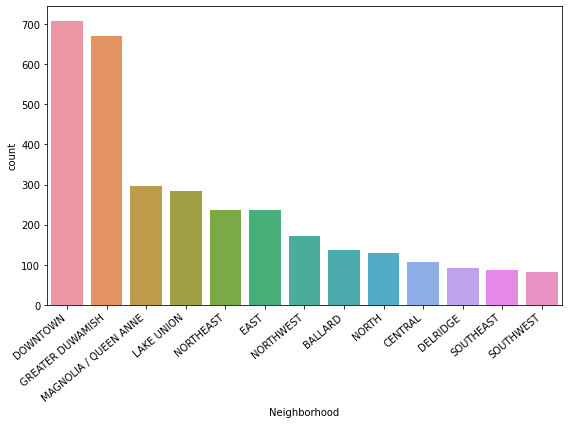

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Neighborhood", order = df["Neighborhood"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

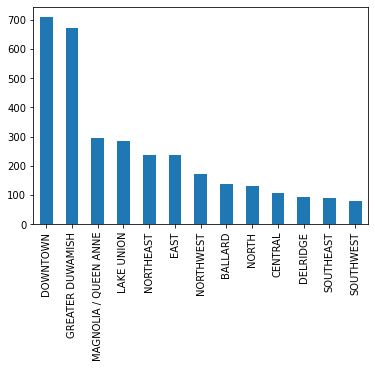

In [50]:
df["Neighborhood"].value_counts().plot(kind="bar");

##### Latitude, longitude

In [51]:
df[["Latitude", "Longitude"]].astype(float).describe()

,Latitude,Longitude
count,3239.00,3239.00
mean,47.62,-122.33
std,0.05,0.02
min,47.50,-122.41
25%,47.59,-122.34
50%,47.61,-122.33
75%,47.65,-122.32
max,47.73,-122.26


Neighborhood will be preferred to latitude and longitude

In [52]:
df.drop(["Latitude", "Longitude"], axis=1, inplace=True)

##### YearBuilt

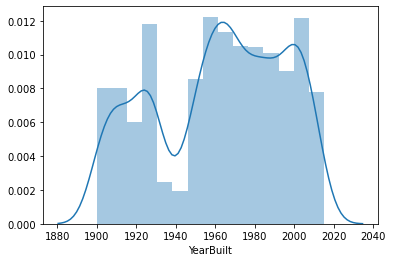

In [53]:
sns.distplot(df["YearBuilt"]);

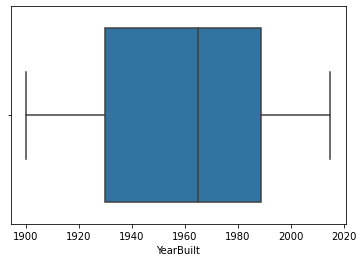

In [54]:
sns.boxplot(df["YearBuilt"]);

Range: 1900 to 2015  
Low construction activity during 1929 crisis ans WWII  
No outlier

##### NumberofBuildings

In [55]:
df[df["NumberofBuildings"] == 0].head()

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
63,2016,NonResidential,EAST,1965,0.00,3.00,179014,0,179014,Medical Office,179014.00,None,0.00,None,0.00,16527711.00,0.00,9886484.00,6814570.00,Normal,430.84
76,2016,NonResidential,MAGNOLIA / QUEEN ANNE,1986,0.00,2.00,66240,2352,63888,Office,45900.00,Data Center,5181.00,Distribution Center,4551.00,4192107.75,0.00,4166305.00,0.00,Normal,29.04
160,2016,NonResidential,GREATER DUWAMISH,1916,0.00,4.00,79600,0,79600,Non-Refrigerated Warehouse,79600.00,None,0.00,None,0.00,2411402.25,0.00,2411402.00,0.00,Normal,16.81
201,2016,NonResidential,DOWNTOWN,1968,0.00,3.00,100734,26731,74003,Office,100734.00,None,0.00,None,0.00,9892566.00,0.00,9788716.00,0.00,Normal,68.24
241,2016,NonResidential,NORTHEAST,1961,0.00,5.00,99005,0,99005,Office,79555.00,None,0.00,None,0.00,5008123.50,0.00,2863212.00,1865277.00,Normal,119.03


In [56]:
df_BAK[df_BAK.index == 63]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
63,89,2015,NonResidential,Medical Office,"POLYCLINIC MEDICAL OFFICE, NORTH BUILDING",1200 HARVARD AVE,SEATTLE,WA,98122,1978201270,3,EAST,47.61249662,-122.3213373,1965,1.00,3.00,179014,0,179014,Medical Office,Medical Office,179014.00,NaN,NaN,NaN,NaN,NaN,48.00,105.40,110.90,221.60,224.00,18868768.00,19858448.00,0.00,2784469.00,9501003.00,93682.00,9368159.00,No,NaN,Compliant,NaN,563.78,2.92
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,Seattle,WA,98122.00,1978201270,3,EAST,47.61,-122.32,1965,0.00,3.00,179014,0,179014,Medical Office,Medical Office,179014.00,NaN,NaN,NaN,NaN,NaN,48.00,93.30,92.30,213.40,210.30,16701055.00,16527711.00,0.00,2897562.75,9886484.00,68145.70,6814570.00,False,NaN,Compliant,NaN,430.84,2.41


In [57]:
# Checked on the Web.. existing builidings -- replace0  by 1
df["NumberofBuildings"].replace(0, 1, inplace=True)

In [58]:
# University - Not a ludicrous outlier
df_BAK[df_BAK["NumberofBuildings"] == 111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.00,1625049001,4,NORTHEAST,47.66,-122.31,1900,111.00,0.00,9320156,0,9320156,College/University,College/University,9320156.00,NaN,NaN,NaN,NaN,NaN,NaN,93.80,0.00,246.60,0.00,873923712.00,0.00,84985240.00,192577488.00,657074389.00,0.00,0.00,False,NaN,Compliant,NaN,11140.56,1.20


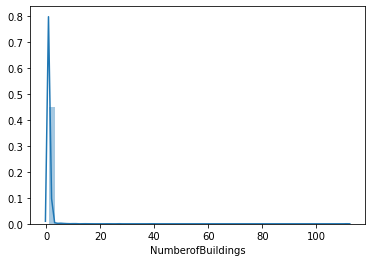

In [59]:
sns.distplot(df["NumberofBuildings"]);

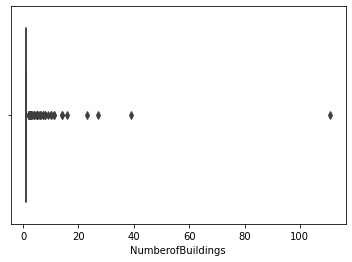

In [60]:
sns.boxplot(df["NumberofBuildings"]);

In [61]:
df["NumberofBuildings"].value_counts()

1.00      3175
3.00        14
2.00        14
5.00         8
6.00         6
4.00         5
7.00         3
10.00        2
11.00        2
14.00        2
8.00         2
39.00        1
27.00        1
9.00         1
16.00        1
23.00        1
111.00       1
Name: NumberofBuildings, dtype: int64

In [62]:
# Only one-building properties would be keep for the analysis (only 68 values dropped).
# Multi-buildings properties energy and emission could be extrapolated one by one
df = df[df["NumberofBuildings"] == 1]
del df["NumberofBuildings"]

##### NumberofFloors

In [63]:
df[df["NumberofFloors"] == 0]

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
166,2015,NonResidential,DOWNTOWN,1999,0.00,934292,0,934292,Hotel,495536.00,Parking,438756.00,Restaurant,49700.00,63811044.00,0.00,39667989.00,24144689.00,Normal,1558.85
489,2015,NonResidential,EAST,2004,0.00,225982,0,225982,Medical Office,200184.00,None,0.00,None,0.00,18715848.00,6765824.00,11792829.00,0.00,Normal,604.45
490,2015,NonResidential,DOWNTOWN,2006,0.00,516407,0,516407,Parking,385196.00,Multifamily Housing,340236.00,Hotel,67627.00,51324836.00,0.00,29882718.00,19099575.00,Normal,1222.69
565,2015,NonResidential,DOWNTOWN,1999,0.00,947987,440185,507802,Other - Mall,561684.00,Other - Entertainment/Public Assembly,100000.00,Restaurant,80000.00,46816216.00,0.00,48145216.00,0.00,Normal,335.63
166,2016,NonResidential,DOWNTOWN,1999,0.00,934292,0,934292,Hotel,495536.00,Parking,438756.00,Restaurant,49700.00,66502836.00,0.00,39364114.00,25683162.00,Normal,1638.46
487,2016,NonResidential,EAST,2004,0.00,225982,0,225982,Medical Office,200184.00,None,0.00,None,0.00,20764814.00,7815663.00,12744957.00,0.00,Normal,692.12
488,2016,NonResidential,DOWNTOWN,2006,0.00,516407,0,516407,Parking,385196.00,Multifamily Housing,340236.00,Hotel,67627.00,40754364.00,0.00,29432803.00,9970512.00,Normal,734.72
564,2016,NonResidential,DOWNTOWN,1999,0.00,947987,0,947987,Other - Mall,561684.00,Other - Entertainment/Public Assembly,100000.00,Restaurant,80000.00,46343304.00,0.00,46510954.00,0.00,Normal,324.25
1754,2016,NonResidential,EAST,1945,0.00,274568,0,274568,Medical Office,228133.00,Parking,135954.00,None,0.00,25358122.00,13296249.00,12015275.00,0.00,Normal,1110.07
3130,2016,NonResidential,NORTHEAST,1940,0.00,384772,0,384772,Non-Refrigerated Warehouse,349953.00,Office,63872.00,None,0.00,16139557.00,0.00,9014872.00,6191888.00,Normal,391.70


In [64]:
# Minimum floor = 1
df["NumberofFloors"].replace(0, 1, inplace=True)

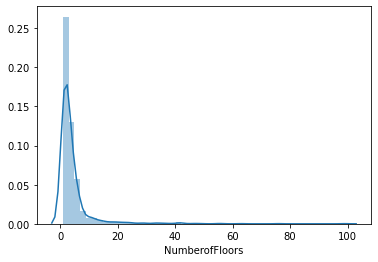

In [65]:
sns.distplot(df["NumberofFloors"]);

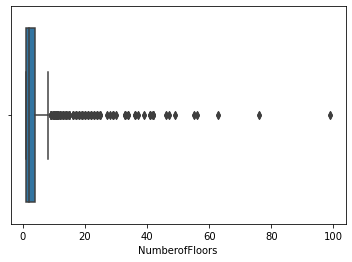

In [66]:
sns.boxplot(df["NumberofFloors"]);

In [67]:
df["NumberofFloors"].value_counts()

1.00     907
2.00     740
3.00     526
4.00     280
5.00     194
6.00     162
7.00      65
8.00      39
11.00     34
10.00     31
12.00     16
14.00     16
9.00      16
13.00     13
15.00     12
19.00     10
42.00      9
17.00      8
29.00      6
21.00      6
22.00      6
16.00      6
25.00      6
33.00      6
20.00      6
24.00      6
18.00      6
23.00      5
41.00      4
34.00      4
36.00      4
49.00      2
37.00      2
63.00      2
28.00      2
47.00      2
55.00      2
46.00      2
30.00      2
56.00      2
27.00      2
76.00      2
99.00      2
39.00      2
Name: NumberofFloors, dtype: int64

##### PropertyGFATotal

In [68]:
df["PropertyGFATotal"].describe()

count      3175.00
mean     109609.27
std      187149.30
min       11285.00
25%       29394.00
50%       48600.00
75%      102796.00
max     2200000.00
Name: PropertyGFATotal, dtype: float64

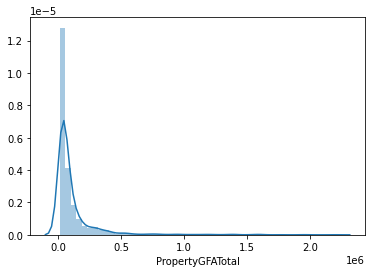

In [69]:
sns.distplot(df["PropertyGFATotal"]);

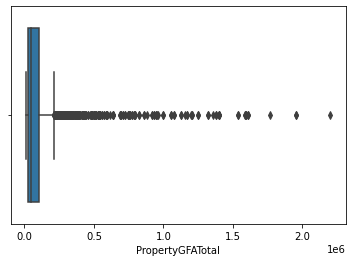

In [70]:
sns.boxplot(df["PropertyGFATotal"]);

In [71]:
df.sort_values("PropertyGFATotal", ascending=False)

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
1494,2016,Campus,EAST,1939,2.00,2200000,0,2200000,College/University,1719643.00,Parking,318960.00,None,0.00,123205560.00,0.00,61672821.00,52975694.00,Normal,3243.48
559,2016,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Office,1680937.00,Parking,319368.00,None,0.00,92537256.00,0.00,87851862.00,5085763.00,Normal,882.56
581,2015,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Office,1680937.00,Parking,319368.00,None,0.00,93255440.00,0.00,90754881.00,3808965.00,Normal,834.96
621,2015,NonResidential,EAST,1994,14.00,1765970,0,1765970,Hospital (General Medical & Surgical),1639334.00,Parking,441551.00,None,0.00,292746272.00,127869744.00,140448322.00,18373320.00,Normal,11824.89
292,2016,NonResidential,DOWNTOWN,1989,56.00,1605578,389860,1215718,Office,1314475.00,Parking,389860.00,Other,30744.00,50984500.00,915654.88,46081813.00,2520230.00,Normal,525.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,2016,Nonresidential COS,BALLARD,1972,1.00,12769,0,12769,Other - Recreation,10912.00,Fitness Center/Health Club/Gym,1670.00,Office,187.00,5370263.50,0.00,1205173.31,3912135.16,Normal,216.18
3371,2016,Nonresidential COS,GREATER DUWAMISH,1990,1.00,12294,0,12294,Office,12294.00,None,0.00,None,0.00,943003.19,0.00,524270.86,325475.02,Normal,20.94
3362,2016,Nonresidential COS,BALLARD,2010,1.00,11968,0,11968,Prison/Incarceration,11968.00,None,0.00,None,0.00,858773.00,0.00,403243.11,380179.98,Normal,23.00
3361,2016,Nonresidential COS,CENTRAL,2013,1.00,11685,0,11685,Prison/Incarceration,11685.00,None,0.00,None,0.00,969142.00,0.00,347288.71,503764.99,Normal,29.18


##### PropertyGFAParking

In [72]:
df.sort_values("PropertyGFAParking")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
3136,2015,NonResidential,DOWNTOWN,2000,11.00,68452,-2,68454,Office,61665.00,Bank Branch,6787.00,None,0.00,3988260.00,0.00,3670451.00,0.00,Normal,25.59
0,2015,NonResidential,DOWNTOWN,1927,12.00,88434,0,88434,Hotel,88434.00,None,0.00,None,0.00,7097539.00,2023032.00,3686160.00,1272388.00,Normal,249.43
548,2016,NonResidential,MAGNOLIA / QUEEN ANNE,1998,5.00,110524,0,110524,Office,98781.00,Other,8634.00,Parking,0.00,6859198.00,0.00,6859197.00,0.00,Normal,47.82
553,2016,NonResidential,DOWNTOWN,1902,3.00,76893,0,76893,Office,90345.00,Parking,33380.00,Retail Store,15845.00,12289373.00,0.00,8209260.00,3820339.00,Normal,260.13
555,2016,NonResidential,DOWNTOWN,1953,7.00,274362,0,274362,Office,274362.00,None,0.00,None,0.00,16572684.00,0.00,15836054.00,704494.00,Normal,147.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2016,NonResidential,EAST,1992,14.00,690158,407795,282363,Medical Office,270384.00,Parking,270383.00,None,0.00,21156670.00,0.00,21156669.00,0.00,Normal,147.49
308,2015,NonResidential,EAST,1992,14.00,690158,407795,282363,Medical Office,270384.00,Parking,270383.00,None,0.00,18841144.00,0.00,18841928.00,0.00,Normal,131.35
565,2015,NonResidential,DOWNTOWN,1999,1.00,947987,440185,507802,Other - Mall,561684.00,Other - Entertainment/Public Assembly,100000.00,Restaurant,80000.00,46816216.00,0.00,48145216.00,0.00,Normal,335.63
273,2016,NonResidential,DOWNTOWN,1989,46.00,1536606,512608,1023998,Office,1002403.00,Parking,377046.00,Other,53116.00,58506844.00,0.00,53668061.00,2938070.00,Normal,530.18


In [73]:
df["PropertyGFAParking"].replace(-3, 0, inplace=True)
df["PropertyGFAParking"].replace(-2, 0, inplace=True)

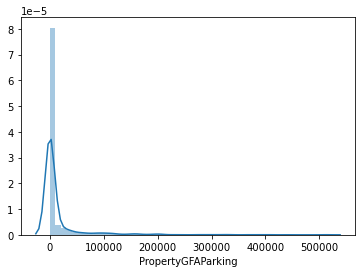

In [74]:
sns.distplot(df["PropertyGFAParking"]);

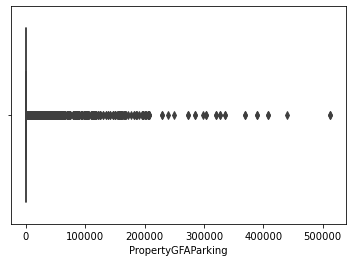

In [75]:
sns.boxplot(df["PropertyGFAParking"]);

In [76]:
df.sort_values("PropertyGFAParking", ascending=False)

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
274,2015,NonResidential,DOWNTOWN,1989,46.00,1536606,512608,1023998,Office,1002403.00,Parking,377046.00,Other,53116.00,58978248.00,0.00,52747171.00,3069000.00,Normal,530.70
273,2016,NonResidential,DOWNTOWN,1989,46.00,1536606,512608,1023998,Office,1002403.00,Parking,377046.00,Other,53116.00,58506844.00,0.00,53668061.00,2938070.00,Normal,530.18
565,2015,NonResidential,DOWNTOWN,1999,1.00,947987,440185,507802,Other - Mall,561684.00,Other - Entertainment/Public Assembly,100000.00,Restaurant,80000.00,46816216.00,0.00,48145216.00,0.00,Normal,335.63
307,2016,NonResidential,EAST,1992,14.00,690158,407795,282363,Medical Office,270384.00,Parking,270383.00,None,0.00,21156670.00,0.00,21156669.00,0.00,Normal,147.49
308,2015,NonResidential,EAST,1992,14.00,690158,407795,282363,Medical Office,270384.00,Parking,270383.00,None,0.00,18841144.00,0.00,18841928.00,0.00,Normal,131.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2015,NonResidential,GREATER DUWAMISH,1941,1.00,48890,0,48890,Non-Refrigerated Warehouse,30889.00,Office,18000.00,None,0.00,2369788.00,0.00,1116552.00,985289.00,Normal,60.11
2182,2015,NonResidential,GREATER DUWAMISH,2000,3.00,43473,0,43473,Office,43473.00,None,0.00,None,0.00,4328527.00,0.00,4328708.00,0.00,Normal,30.18
2184,2015,NonResidential,DELRIDGE,1990,1.00,40265,0,40265,Retail Store,40793.00,None,0.00,None,0.00,3635403.00,0.00,3603942.00,163020.00,Normal,33.78
2185,2015,NonResidential,DELRIDGE,2005,1.00,26208,0,26208,Retail Store,32427.00,None,0.00,None,0.00,1436354.00,0.00,1060751.00,395332.00,Normal,28.39


##### PropertyGFABuilding(s)

In [77]:
df["PropertyGFABuilding(s)"].describe()

count      3175.00
mean      96392.96
std      163077.18
min      -50550.00
25%       28344.00
50%       46560.00
75%       92792.00
max     2200000.00
Name: PropertyGFABuilding(s), dtype: float64

In [78]:
df.sort_values("PropertyGFABuilding(s)")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
3322,2015,NonResidential,NORTHEAST,2014,3.00,33648,84198,-50550,Parking,83600.00,Automobile Dealership,39000.00,None,0.00,1389553.00,0.00,1389610.00,0.00,Normal,9.69
3139,2015,NonResidential,MAGNOLIA / QUEEN ANNE,1982,5.00,54015,97325,-43310,Office,54015.00,None,0.00,None,0.00,3455247.00,0.00,3455391.00,0.00,Normal,24.09
1109,2016,NonResidential,BALLARD,1966,2.00,34636,31000,3636,Senior Care Community,36000.00,Parking,0.00,None,0.00,12805711.00,0.00,3561375.00,8587344.00,Normal,480.90
830,2016,NonResidential,DOWNTOWN,2006,2.00,33792,22867,10925,Social/Meeting Hall,8969.00,Parking,8540.00,Other - Entertainment/Public Assembly,1600.00,2622096.50,0.00,2269684.00,278164.00,Normal,30.60
841,2015,NonResidential,DOWNTOWN,2006,2.00,33792,22867,10925,Social/Meeting Hall,8969.00,Parking,8540.00,Other - Entertainment/Public Assembly,1600.00,2271686.00,0.00,1947148.00,240446.00,Normal,26.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016,NonResidential,DOWNTOWN,2005,42.00,1592914,0,1592914,Office,914832.00,Parking,348788.00,Financial Office,303910.00,56785916.00,986403.19,55123924.00,388532.00,Normal,481.06
581,2015,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Office,1680937.00,Parking,319368.00,None,0.00,93255440.00,0.00,90754881.00,3808965.00,Normal,834.96
559,2016,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Office,1680937.00,Parking,319368.00,None,0.00,92537256.00,0.00,87851862.00,5085763.00,Normal,882.56
621,2015,NonResidential,EAST,1994,14.00,1765970,0,1765970,Hospital (General Medical & Surgical),1639334.00,Parking,441551.00,None,0.00,292746272.00,127869744.00,140448322.00,18373320.00,Normal,11824.89


In [79]:
# Drop negative values
df.drop([3322, 3139], axis=0, inplace=True)

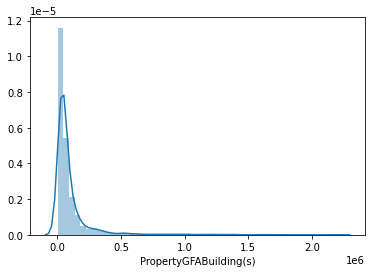

In [80]:
sns.distplot(df["PropertyGFABuilding(s)"]);

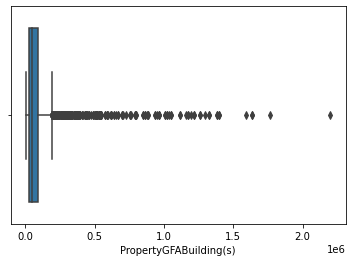

In [81]:
sns.boxplot(df["PropertyGFABuilding(s)"]);

##### LargestPropertyUseType

In [82]:
df["LargestPropertyUseType"].value_counts()

Office                                                  965
Non-Refrigerated Warehouse                              390
K-12 School                                             266
Retail Store                                            198
Other                                                   186
Hotel                                                   142
Worship Facility                                        141
Distribution Center                                     104
Medical Office                                           83
Supermarket/Grocery Store                                78
Parking                                                  53
Self-Storage Facility                                    52
Other - Recreation                                       48
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Residence Hall/Dormitory                                 38
College/University                      

In [83]:
dict = {
    "Multifamily Housing": "Residential",
    "Office": "Services",
    "Non-Refrigerated Warehouse": "Other",
    "K-12 School": "Education",
    "Retail Store": "Retail",
    "Worship Facility": "Public assembly",
    "Distribution Center": "Food facility",
    "Senior Care Community": "Health",
    "Medical Office": "Health",
    "Supermarket/Grocery Store": "Food facility",
    "Self-Storage Facility": "Other",
    "Other - Recreation": "Public assembly",
    "Other - Entertainment/Public Assembly": "Public assembly",
    "Residence Hall/Dormitory": "Residential",
    "College/University": "Education",
    "Refrigerated Warehouse": "Food facility",
    "Restaurant": "Retail",
    "Laboratory": "Health",
    "Social/Meeting Hall": "Public assembly",
    "Hospital (General Medical & Surgical)": "Health",
    "Other - Lodging/Residential": "Residential",
    "Repair Services (Vehicle, Shoe, Locksmith, etc)": "Retail",
    "Automobile Dealership": "Retail",
    "Museum": "Public assembly",
    "Other - Services": "Services",
    "Fitness Center/Health Club/Gym": "Public assembly",
    "Bank Branch": "Services",
    "Other - Education": "Education",
    "Library": "Retail",
    "Other/Specialty Hospital": "Health",
    "Performing Arts": "Public assembly",
    "Other - Mall": "Strip Mall",
    "Financial Office": "Services",
    "Urgent Care/Clinic/Other Outpatient": "Health",
    "Pre-school/Daycare": "Education",
    "Other - Restaurant/Bar": "Retail",
    "Other - Utility": "Other",
    "Adult Education": "Education",
    "Lifestyle Center": "Strip Mall",
    "Prison/Incarceration": "Other",
    "Residential Care Facility": "Health",
    "Other - Public Services": "Services",
    "Police Station": "Services",
    "Fire Station": "Services",
    "Food Service": "Food facility",
    "Courthouse": "Public assembly",
    "Convention Center": "Public assembly",
    "Movie Theater": "Public assembly",
    "Personal Services (Health/Beauty, Dry Cleaning, etc)": "Retail",
    "Wholesale Club/Supercenter": "Strip Mall",
    "Outpatient Rehabilitation/Physical Therapy": "Health",
    "Swimming Pool": "Public assembly",
    "Bar/Nightclub": "Public assembly",
    "Food Sales": "Food facility",
    "Vocational School": "Education",
    "Convenience Store without Gas Station": "Retail",
    "Enclosed Mall": "Strip Mall",
    "Other - Technology/Science": "Other",
    "Fast Food Restaurant": "Retail"
}
df.replace({"LargestPropertyUseType": dict}, inplace=True)

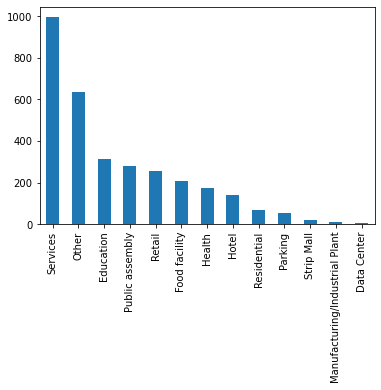

In [84]:
df["LargestPropertyUseType"].value_counts().plot(kind="bar");

##### LargestPropertyUseTypeGFA	

In [85]:
df["LargestPropertyUseTypeGFA"].describe()

count      3172.00
mean      89041.83
std      151001.48
min        5656.00
25%       25200.00
50%       42757.50
75%       88360.00
max     1719643.00
Name: LargestPropertyUseTypeGFA, dtype: float64

In [86]:
df.sort_values("LargestPropertyUseTypeGFA")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
2904,2016,NonResidential,EAST,1947,2.00,21656,0,21656,Public assembly,5656.00,Other - Public Services,5561.00,Restaurant,5090.00,1607972.25,0.00,726238.00,881734.00,Normal,51.89
2594,2015,NonResidential,EAST,1924,2.00,24476,0,24476,Services,5872.00,Other - Entertainment/Public Assembly,4425.00,Restaurant,3912.00,2623229.00,0.00,1079403.00,1543871.00,Normal,89.52
1320,2015,NonResidential,DOWNTOWN,1918,1.00,34617,0,34617,Retail,6455.00,Office,5813.00,Manufacturing/Industrial Plant,5581.00,5000668.00,0.00,2881453.00,2158190.00,Normal,134.71
1309,2016,NonResidential,DOWNTOWN,1918,1.00,34617,0,34617,Retail,6455.00,Office,5813.00,Manufacturing/Industrial Plant,5581.00,5123179.00,0.00,2805989.00,2330615.00,Normal,143.34
3374,2016,Nonresidential COS,GREATER DUWAMISH,1989,1.00,14101,0,14101,Public assembly,6601.00,Fitness Center/Health Club/Gym,6501.00,Pre-school/Daycare,484.00,782841.31,0.00,348870.18,370601.00,Normal,22.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2016,NonResidential,GREATER DUWAMISH,1999,6.00,1585960,327680,1258280,Public assembly,1585960.00,Parking,0.00,None,0.00,62160304.00,0.00,49439914.00,10317518.00,Normal,892.63
621,2015,NonResidential,EAST,1994,14.00,1765970,0,1765970,Health,1639334.00,Parking,441551.00,None,0.00,292746272.00,127869744.00,140448322.00,18373320.00,Normal,11824.89
559,2016,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Services,1680937.00,Parking,319368.00,None,0.00,92537256.00,0.00,87851862.00,5085763.00,Normal,882.56
581,2015,NonResidential,DOWNTOWN,1985,76.00,1952220,319400,1632820,Services,1680937.00,Parking,319368.00,None,0.00,93255440.00,0.00,90754881.00,3808965.00,Normal,834.96


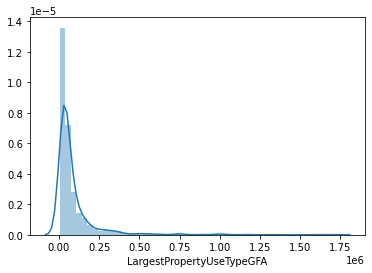

In [87]:
sns.distplot(df["LargestPropertyUseTypeGFA"]);

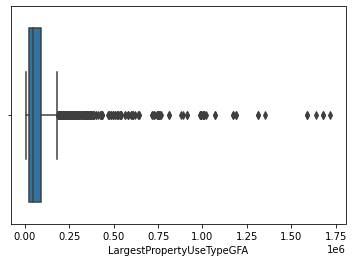

In [88]:
sns.boxplot(df["LargestPropertyUseTypeGFA"]);

##### SecondLargestPropertyUseType

In [89]:
df.replace({"SecondLargestPropertyUseType": dict}, inplace=True)

In [90]:
df["SecondLargestPropertyUseType"].value_counts()

None                              1537
Parking                            635
Services                           363
Retail                             244
Other                              155
Public assembly                     79
Food facility                       41
Health                              31
Residential                         27
Data Center                         26
Education                           23
Hotel                                6
Manufacturing/Industrial Plant       4
Strip Mall                           1
Name: SecondLargestPropertyUseType, dtype: int64

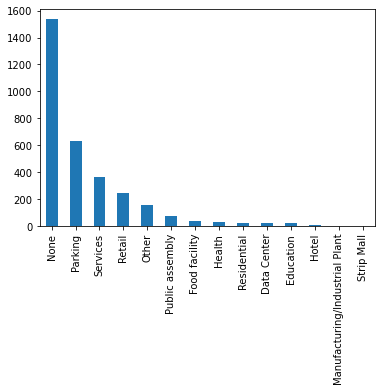

In [91]:
df["SecondLargestPropertyUseType"].value_counts().plot(kind="bar");

##### SecondLargestPropertyUseTypeGFA

In [92]:
df["SecondLargestPropertyUseTypeGFA"].describe()

count     3172.00
mean     18155.35
std      50871.48
min          0.00
25%          0.00
50%          0.00
75%      12702.00
max     686750.00
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

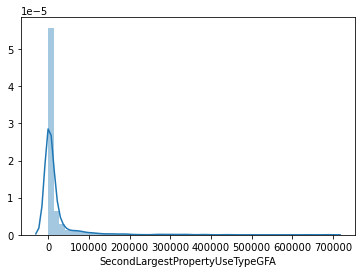

In [93]:
sns.distplot(df["SecondLargestPropertyUseTypeGFA"]);

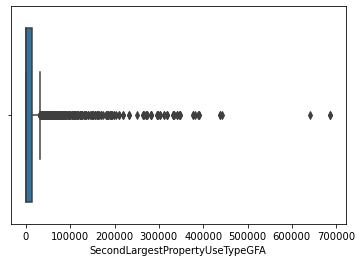

In [94]:
sns.boxplot(df["SecondLargestPropertyUseTypeGFA"]);

In [95]:
df.sort_values("SecondLargestPropertyUseTypeGFA")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
0,2015,NonResidential,DOWNTOWN,1927,12.00,88434,0,88434,Hotel,88434.00,None,0.00,None,0.00,7097539.00,2023032.00,3686160.00,1272388.00,Normal,249.43
218,2016,NonResidential,DOWNTOWN,1922,15.00,388934,0,388934,Services,388934.00,None,0.00,None,0.00,18982748.00,1192343.75,17384553.00,0.00,Normal,213.23
201,2016,NonResidential,DOWNTOWN,1968,3.00,100734,26731,74003,Services,100734.00,None,0.00,None,0.00,9892566.00,0.00,9788716.00,0.00,Normal,68.24
197,2016,Nonresidential COS,DOWNTOWN,1980,2.00,69400,0,69400,Public assembly,69400.00,None,0.00,None,0.00,15230290.00,0.00,10534370.00,4299104.00,Normal,301.76
196,2016,NonResidential,DOWNTOWN,2003,8.00,254273,38800,215473,Hotel,277000.00,None,0.00,None,0.00,26831896.00,0.00,13763542.00,12895700.00,Normal,780.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2016,NonResidential,DOWNTOWN,1999,1.00,934292,0,934292,Hotel,495536.00,Parking,438756.00,Restaurant,49700.00,66502836.00,0.00,39364114.00,25683162.00,Normal,1638.46
621,2015,NonResidential,EAST,1994,14.00,1765970,0,1765970,Health,1639334.00,Parking,441551.00,None,0.00,292746272.00,127869744.00,140448322.00,18373320.00,Normal,11824.89
35,2016,Campus,GREATER DUWAMISH,1992,3.00,494835,0,494835,Services,757027.00,Health,639931.00,Non-Refrigerated Warehouse,459748.00,471613856.00,0.00,150476283.00,297909000.00,Normal,16870.98
305,2015,NonResidential,DOWNTOWN,1990,6.00,1400000,0,1400000,Public assembly,1072000.00,Parking,686750.00,None,0.00,79041984.00,16811018.00,58718556.00,1637420.00,Normal,1793.90


##### ThirdLargestPropertyUseType

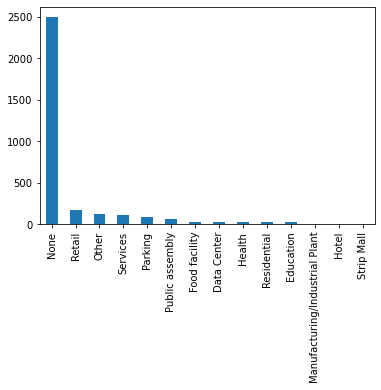

In [96]:
df.replace({"ThirdLargestPropertyUseType": dict}, inplace=True)
df["ThirdLargestPropertyUseType"].value_counts().plot(kind="bar");

##### ThirdLargestPropertyUseTypeGFA

In [97]:
df["ThirdLargestPropertyUseTypeGFA"].describe()

count     3172.00
mean      2954.47
std      16117.19
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     459748.00
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

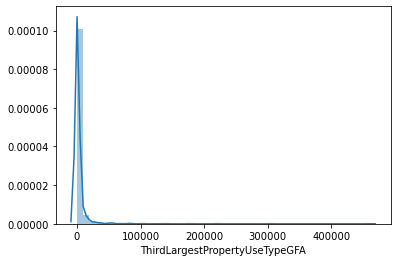

In [98]:
sns.distplot(df["ThirdLargestPropertyUseTypeGFA"]);

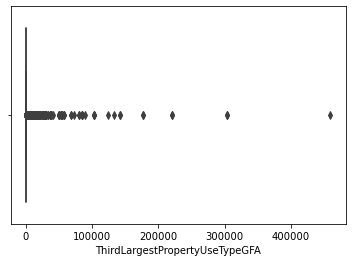

In [99]:
sns.boxplot(df["ThirdLargestPropertyUseTypeGFA"]);

In [100]:
df.sort_values("ThirdLargestPropertyUseTypeGFA")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
0,2015,NonResidential,DOWNTOWN,1927,12.00,88434,0,88434,Hotel,88434.00,None,0.00,None,0.00,7097539.00,2023032.00,3686160.00,1272388.00,Normal,249.43
484,2016,NonResidential,DELRIDGE,1991,5.00,138106,16221,121885,Services,119083.00,Parking,16221.00,None,0.00,8381834.50,0.00,8381833.00,0.00,Normal,58.43
485,2016,NonResidential,GREATER DUWAMISH,1973,1.00,56572,0,56572,Retail,56576.00,None,0.00,None,0.00,2540840.50,0.00,1315085.00,1094344.00,Normal,67.29
487,2016,NonResidential,EAST,2004,1.00,225982,0,225982,Health,200184.00,None,0.00,None,0.00,20764814.00,7815663.00,12744957.00,0.00,Normal,692.12
492,2016,NonResidential,EAST,1985,10.00,422503,206580,215923,Health,197408.00,None,0.00,None,0.00,17254810.00,994154.31,16260654.00,0.00,Normal,190.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2016,NonResidential,GREATER DUWAMISH,1912,6.00,1380959,0,1380959,Services,1000730.00,Retail,281296.00,Other,220303.00,75252304.00,0.00,67760546.00,6370020.00,Normal,810.70
479,2015,NonResidential,GREATER DUWAMISH,1912,6.00,1380959,0,1380959,Services,1000730.00,Retail,281296.00,Other,220303.00,80627768.00,0.00,69444248.00,8831128.00,Normal,953.12
492,2015,NonResidential,DOWNTOWN,2005,42.00,1592914,297457,1295457,Services,914832.00,Parking,348788.00,Services,303910.00,0.00,1099052.00,56530281.00,414587.00,Normal,500.93
490,2016,NonResidential,DOWNTOWN,2005,42.00,1592914,0,1592914,Services,914832.00,Parking,348788.00,Services,303910.00,56785916.00,986403.19,55123924.00,388532.00,Normal,481.06


##### Target 1: SiteEnergyUseWN(kBtu)

In [101]:
df["SiteEnergyUseWN(kBtu)"].describe()

count        3172.00
mean      7384454.82
std      18294250.52
min             0.00
25%       1301933.47
50%       2635972.00
75%       6977629.50
max     471613856.00
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [102]:
(df["SiteEnergyUseWN(kBtu)"] == 0).sum()

35

38 buildings with a SiteEnergyUseWN(kBtu) nul value -- drop

In [103]:
df = df[df["SiteEnergyUseWN(kBtu)"] != 0]

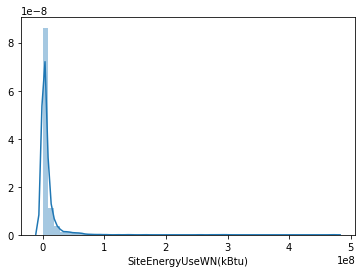

In [104]:
sns.distplot(df["SiteEnergyUseWN(kBtu)"]);

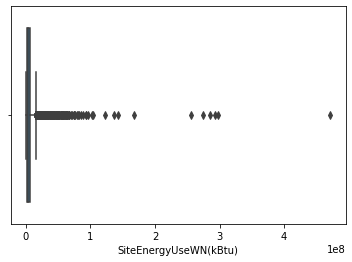

In [105]:
sns.boxplot(df["SiteEnergyUseWN(kBtu)"]);

In [106]:
df.sort_values("SiteEnergyUseWN(kBtu)")

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions
1916,2015,NonResidential,MAGNOLIA / QUEEN ANNE,1948,1.00,46970,0,46970,Other,46970.00,None,0.00,None,0.00,11441.00,0.00,11442.00,0.00,Normal,0.08
2212,2015,NonResidential,GREATER DUWAMISH,1910,3.00,27690,0,27690,Other,24717.00,Parking,0.00,None,0.00,17150.00,0.00,17150.00,0.00,Normal,0.12
2189,2016,NonResidential,GREATER DUWAMISH,1910,3.00,27690,0,27690,Other,24717.00,Parking,0.00,None,0.00,17260.00,0.00,16809.00,0.00,Low outlier,0.12
1229,2016,NonResidential,DOWNTOWN,1903,3.00,57720,0,57720,Services,25000.00,None,0.00,None,0.00,24105.50,0.00,24105.00,0.00,Low outlier,0.17
1306,2015,NonResidential,DOWNTOWN,1900,3.00,49760,0,49760,Other,24019.00,None,0.00,None,0.00,24126.00,0.00,24127.00,0.00,Normal,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2016,NonResidential,DOWNTOWN,1981,33.00,429405,0,429405,Data Center,218997.00,Services,210409.00,None,0.00,274725984.00,0.00,274532495.00,149672.00,Normal,1921.82
560,2015,NonResidential,DOWNTOWN,1981,33.00,429405,0,429405,Data Center,218997.00,Services,210409.00,None,0.00,284867168.00,0.00,284726322.00,152639.00,Normal,1992.96
621,2015,NonResidential,EAST,1994,14.00,1765970,0,1765970,Health,1639334.00,Parking,441551.00,None,0.00,292746272.00,127869744.00,140448322.00,18373320.00,Normal,11824.89
170,2015,NonResidential,EAST,2000,8.00,1158691,0,1158691,Health,1350182.00,Parking,387651.00,None,0.00,297740960.00,122701720.00,170891586.00,2226424.00,Normal,10780.64


In [512]:
pt_std_en = PowerTransformer(method='yeo-johnson', standardize=True)
df["SiteEnergyUseWN(kBtu)_log"] = pt_std_en.fit_transform(np.array(df["SiteEnergyUseWN(kBtu)"]).reshape(-1,1))[:,0]

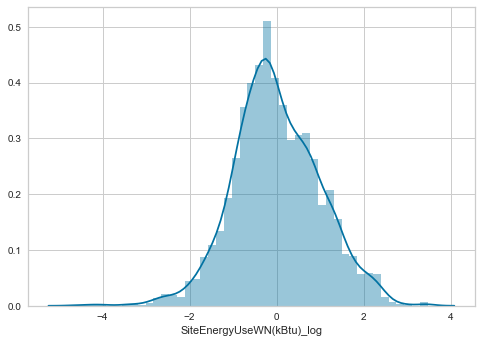

In [513]:
sns.distplot(df["SiteEnergyUseWN(kBtu)_log"]);

In [109]:
pt_nostd_en = PowerTransformer(method='yeo-johnson', standardize=False)
df["SiteEnergyUseWN(kBtu)_log_nostd"] = pt_nostd_en.fit_transform(np.array(df["SiteEnergyUseWN(kBtu)"]).reshape(-1,1))[:,0]

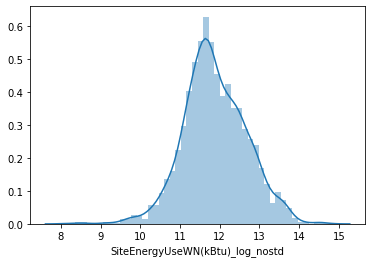

In [110]:
sns.distplot(df["SiteEnergyUseWN(kBtu)_log_nostd"]);

<Figure size 576x576 with 0 Axes>

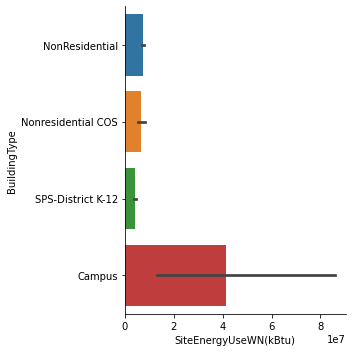

In [111]:
plt.figure(figsize=(8, 8))
sns.catplot(data=df, x="SiteEnergyUseWN(kBtu)", y="BuildingType", kind="bar")
plt.show();

##### SteamUse(kBtu)

In [112]:
df["SteamUse(kBtu)"].describe()

count        3137.00
mean       379064.60
std       3895796.73
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     127869744.00
Name: SteamUse(kBtu), dtype: float64

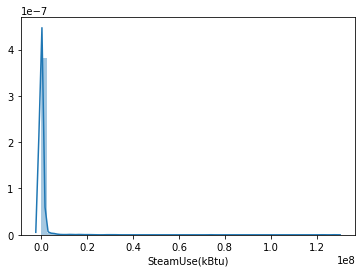

In [113]:
sns.distplot(df["SteamUse(kBtu)"]);

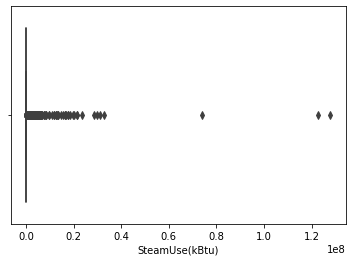

In [114]:
sns.boxplot(df["SteamUse(kBtu)"]);

In [115]:
(df["SteamUse(kBtu)"] != 0).sum()

213

Steam energy used only by 213 buildings.

##### Electricity(kBtu)

In [116]:
df["Electricity(kBtu)"].describe()

count        3137.00
mean      5113839.08
std      12380034.04
min       -115417.00
25%        722921.00
50%       1591782.00
75%       4751288.00
max     284726322.00
Name: Electricity(kBtu), dtype: float64

In [117]:
df[df["Electricity(kBtu)"] < 0]

,DataYear,BuildingType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd
3206,2016,NonResidential,CENTRAL,2013,6.00,52000,0,52000,Services,48159.00,None,0.00,None,0.00,240132.09,0.00,-115417.00,0.00,Normal,-0.80,-2.05,10.25


Probably producing his own electricity -- drop

In [118]:
df.drop(3206, inplace=True)

In [119]:
df["Electricity(kBtu)"].describe()

count        3135.00
mean      5116677.73
std      12383457.52
min             0.00
25%        723080.50
50%       1591795.00
75%       4754293.50
max     284726322.00
Name: Electricity(kBtu), dtype: float64

##### NaturalGas(kBtu)

In [120]:
df["NaturalGas(kBtu)"].describe()

count        3135.00
mean      1701152.07
std       7095349.32
min             0.00
25%             0.00
50%        480992.00
75%       1430686.00
max     297909000.00
Name: NaturalGas(kBtu), dtype: float64

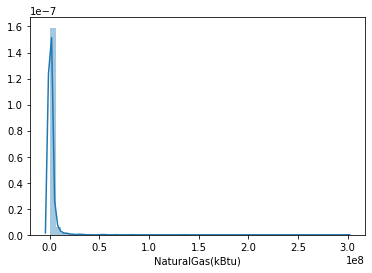

In [121]:
sns.distplot(df["NaturalGas(kBtu)"]);

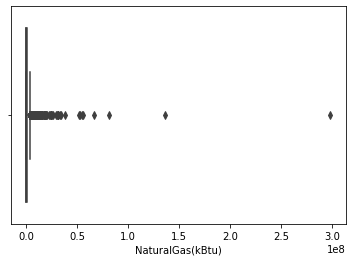

In [122]:
sns.boxplot(df["NaturalGas(kBtu)"]);

##### Outlier

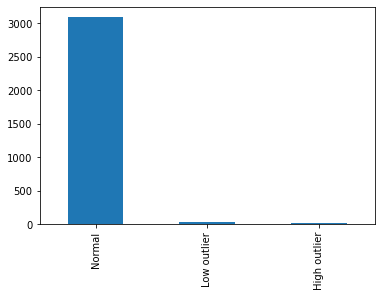

In [123]:
df["Outlier"].value_counts().plot(kind="bar");

##### Target2: TotalGHGEmissions

In [124]:
df["TotalGHGEmissions"].describe()

count    3135.00
mean      155.30
std       538.57
min         0.00
25%        19.73
50%        48.76
75%       134.69
max     16870.98
Name: TotalGHGEmissions, dtype: float64

In [125]:
df = df[df["TotalGHGEmissions"] > 0]

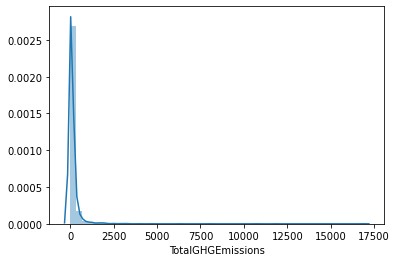

In [126]:
sns.distplot(df["TotalGHGEmissions"]);

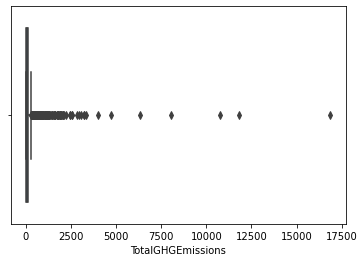

In [127]:
sns.boxplot(df["TotalGHGEmissions"]);

In [128]:
pt_std_em = PowerTransformer(method='yeo-johnson', standardize=True)
pt_nostd_em = PowerTransformer(method='yeo-johnson', standardize=True)
df["TotalGHGEmissions_log"] = pt_std_em.fit_transform(np.array(df["TotalGHGEmissions"]).reshape(-1,1))[:,0]
df["TotalGHGEmissions_log_nostd"] = pt_nostd_em.fit_transform(np.array(df["TotalGHGEmissions"]).reshape(-1,1))[:,0]

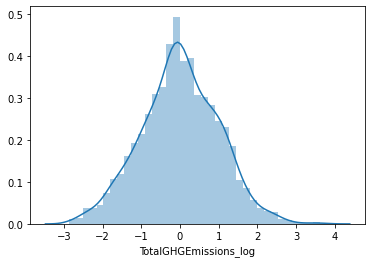

In [129]:
sns.distplot(df["TotalGHGEmissions_log"]);

### Bivariate analysis

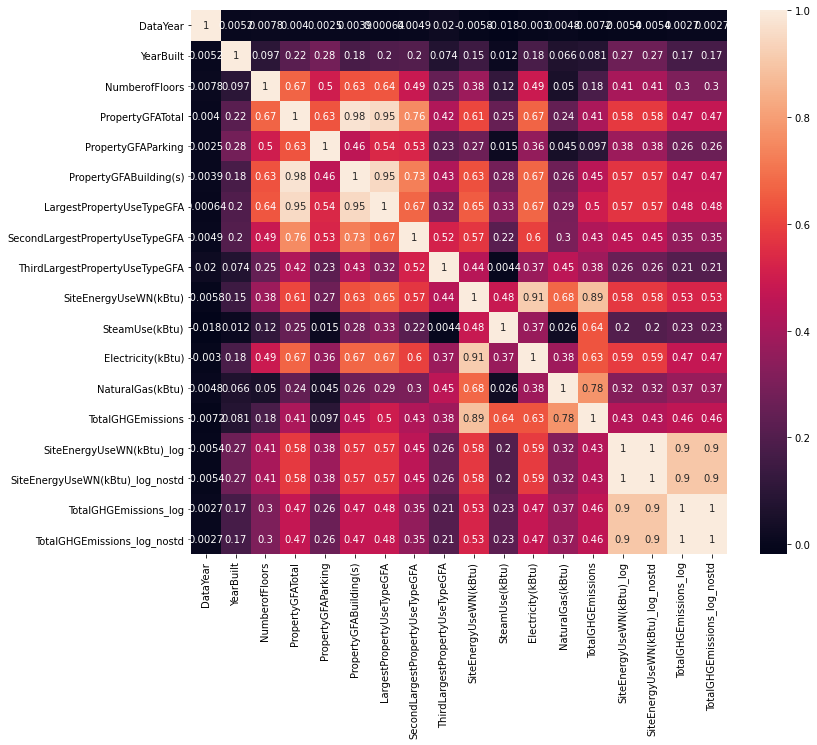

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show();

Logical colinearity between the different GFA values.  
Featuring required.

##### Featuring

In [131]:
# Creation of the building age feature
df["AgeBuilding"] = df["DataYear"] - df["YearBuilt"]
df.drop(columns=["DataYear", "YearBuilt"], inplace=True)

In [132]:
# Origin of the energy used (%) - steam, electricity, natural gas
df["RatioSteam"] = df["SteamUse(kBtu)"] / df["SiteEnergyUseWN(kBtu)"]
df["RatioElectricity"] = df["Electricity(kBtu)"] / df["SiteEnergyUseWN(kBtu)"]
df["RatioNaturalGas"] = df["NaturalGas(kBtu)"] / df["SiteEnergyUseWN(kBtu)"]
df.drop(columns=["SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)"], inplace=True)

In [133]:
# PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s)  
# Let's keep only the ratio PropertyGFABuilding(s)/PropertyGFATotal (PropertyGFAParking can be deduced)
df["RatioBuilding"] = df["PropertyGFABuilding(s)"] / df["PropertyGFATotal"]
df.drop(columns=["PropertyGFABuilding(s)", "PropertyGFAParking"], inplace=True)

In [134]:
df["RatioBuilding"].describe()

count   3134.00
mean       0.94
std        0.14
min        0.10
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: RatioBuilding, dtype: float64

In [135]:
# Let's also use ratio for largest, 2nd and 3rd property use
df["FirstUse"] = df["LargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]
df["SecondUse"] = df["SecondLargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]
df["ThirdUse"] = df["ThirdLargestPropertyUseTypeGFA"] / df["PropertyGFATotal"]

In [136]:
df["Use"] = df["FirstUse"] + df["SecondUse"] + df["ThirdUse"]
df["Use"].describe()

count   3134.00
mean       1.00
std        0.24
min        0.18
25%        0.98
50%        1.00
75%        1.00
max        6.43
Name: Use, dtype: float64

In [137]:
df.sort_values("Use")

,BuildingType,Neighborhood,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd,TotalGHGEmissions_log,TotalGHGEmissions_log_nostd,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse,Use
311,NonResidential,LAKE UNION,5.00,109017,Hotel,20000.00,None,0.00,None,0.00,10503717.00,Normal,250.25,0.97,12.65,1.11,1.11,36,0.00,0.58,0.37,0.73,0.18,0.00,0.00,0.18
34,NonResidential,NORTHEAST,2.00,126394,Other,26225.00,None,0.00,None,0.00,319916.00,Normal,3.71,-1.81,10.44,-1.74,-1.74,60,0.00,0.85,0.11,1.00,0.21,0.00,0.00,0.21
3267,NonResidential,DOWNTOWN,3.00,197395,Health,38800.00,Services,3650.00,Services,586.00,2842128.00,Normal,58.28,-0.04,11.85,0.11,0.11,27,0.00,0.66,0.30,0.21,0.20,0.02,0.00,0.22
34,NonResidential,NORTHEAST,2.00,110356,Other,26225.00,None,0.00,None,0.00,326223.09,Normal,3.93,-1.79,10.45,-1.70,-1.70,61,0.00,0.86,0.11,1.00,0.24,0.00,0.00,0.24
3308,NonResidential,DOWNTOWN,3.00,167300,Health,38800.00,Services,3650.00,Services,586.00,3833436.00,Normal,70.38,0.20,12.04,0.24,0.24,26,0.00,0.71,0.25,1.00,0.23,0.02,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,NonResidential,NORTHEAST,3.00,33648,Parking,83600.00,Retail,39000.00,None,0.00,1399581.62,Normal,9.76,-0.60,11.40,-1.12,-1.12,2,0.00,1.00,0.00,1.00,2.48,1.16,0.00,3.64
35,Campus,GREATER DUWAMISH,3.00,494835,Services,757027.00,Health,639931.00,Other,459748.00,471613856.00,Normal,16870.98,3.67,14.80,3.78,3.78,24,0.00,0.32,0.63,1.00,1.53,1.29,0.93,3.75
2246,NonResidential,GREATER DUWAMISH,1.00,16300,Food facility,65164.00,None,0.00,None,0.00,150167.80,Normal,1.60,-2.45,9.93,-2.19,-2.19,64,0.00,0.92,0.08,1.00,4.00,0.00,0.00,4.00
967,Campus,NORTHEAST,3.00,21500,Education,96154.00,None,0.00,None,0.00,6844304.00,Normal,180.44,0.65,12.39,0.88,0.88,26,0.00,0.46,0.44,1.00,4.47,0.00,0.00,4.47


In [138]:
df[df["Use"] > 1.20]

,BuildingType,Neighborhood,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd,TotalGHGEmissions_log,TotalGHGEmissions_log_nostd,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse,Use
4,NonResidential,DOWNTOWN,18.00,119890,Hotel,123445.00,Parking,68009.00,Public assembly,0.00,15078243.00,Normal,507.70,1.24,12.87,1.58,1.58,35,0.00,0.40,0.58,0.90,1.03,0.57,0.00,1.60
16,NonResidential,DOWNTOWN,6.00,103911,Public assembly,90000.00,Services,40000.00,Public assembly,0.00,10843936.00,Normal,411.09,0.99,12.67,1.44,1.44,85,0.41,0.49,0.06,1.00,0.87,0.38,0.00,1.25
59,NonResidential,SOUTHWEST,5.00,217603,Health,296313.00,Parking,0.00,None,0.00,50629892.00,Normal,1858.84,2.13,13.57,2.42,2.42,93,0.00,0.24,0.66,1.00,1.36,0.00,0.00,1.36
66,NonResidential,LAKE UNION,2.00,58320,Retail,72072.00,None,0.00,None,0.00,1383366.00,Normal,39.69,-0.61,11.40,-0.16,-0.16,86,0.00,0.27,0.50,1.00,1.24,0.00,0.00,1.24
67,NonResidential,LAKE UNION,5.00,316306,Services,261826.00,Parking,150726.00,Other,15139.00,13429220.00,Normal,131.03,1.15,12.80,0.67,0.67,5,0.00,0.93,0.06,1.00,0.83,0.48,0.05,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,NonResidential,NORTHWEST,2.00,48925,Education,63500.00,None,0.00,None,0.00,1695022.25,Normal,22.76,-0.44,11.53,-0.54,-0.54,2,0.00,0.82,0.15,1.00,1.30,0.00,0.00,1.30
3253,NonResidential,DELRIDGE,2.00,44162,Education,44162.00,Parking,15761.00,None,0.00,1679541.25,Normal,38.13,-0.45,11.52,-0.18,-0.18,6,0.00,0.57,0.35,1.00,1.00,0.36,0.00,1.36
3264,NonResidential,EAST,8.00,374466,Health,1010135.00,None,0.00,None,0.00,167207104.00,Normal,6330.91,2.97,14.24,3.19,3.19,96,0.44,0.54,0.00,1.00,2.70,0.00,0.00,2.70
3281,NonResidential,LAKE UNION,6.00,427181,Services,427181.00,Parking,169195.00,None,0.00,16810854.00,Normal,213.70,1.32,12.93,1.00,1.00,2,0.00,0.85,0.13,1.00,1.00,0.40,0.00,1.40


In [139]:
# Probably bad recording (Largest > Total) - Keeping a 20% margin error
df = df[df["Use"] <= 1.2]
del df["Use"]

In [140]:
df.drop(columns=["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"], inplace=True)

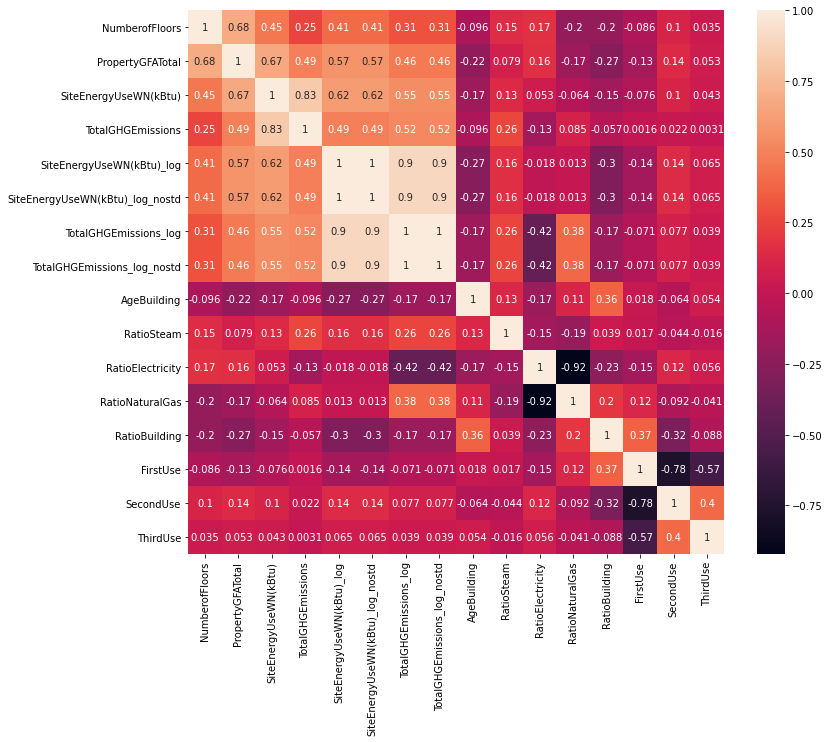

In [141]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show();

In [142]:
# sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [143]:
df.columns

Index(['BuildingType', 'Neighborhood', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'SiteEnergyUseWN(kBtu)', 'Outlier',
       'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)_log',
       'SiteEnergyUseWN(kBtu)_log_nostd', 'TotalGHGEmissions_log',
       'TotalGHGEmissions_log_nostd', 'AgeBuilding', 'RatioSteam',
       'RatioElectricity', 'RatioNaturalGas', 'RatioBuilding', 'FirstUse',
       'SecondUse', 'ThirdUse'],
      dtype='object')

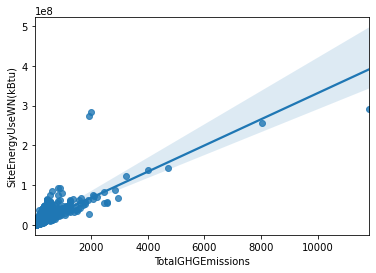

In [144]:
sns.regplot(df["TotalGHGEmissions"], df["SiteEnergyUseWN(kBtu)"]);

### Modeling

In [145]:
#categorical data
categorical_cols = ["BuildingType", "Neighborhood", "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Outlier"] 

#import pandas as pd
df2 = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

In [146]:
df2.head()

,NumberofFloors,PropertyGFATotal,SiteEnergyUseWN(kBtu),TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd,TotalGHGEmissions_log,TotalGHGEmissions_log_nostd,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Education,LargestPropertyUseType_Food facility,LargestPropertyUseType_Health,LargestPropertyUseType_Hotel,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Public assembly,LargestPropertyUseType_Residential,LargestPropertyUseType_Retail,LargestPropertyUseType_Services,LargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Education,SecondLargestPropertyUseType_Food facility,SecondLargestPropertyUseType_Health,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_None,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Public assembly,SecondLargestPropertyUseType_Residential,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_Services,SecondLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Food facility,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Public assembly,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_Services,ThirdLargestPropertyUseType_Strip Mall,Outlier_Low outlier,Outlier_Normal
0,12.00,88434,7097539.00,249.43,0.67,12.41,1.10,1.10,88,0.29,0.52,0.18,1.00,1.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,11.00,103566,8765788.00,263.51,0.83,12.54,1.14,1.14,19,0.00,0.45,0.51,0.85,0.81,0.15,0.04,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,41.00,961990,75506272.00,2061.48,2.41,13.80,2.49,2.49,46,0.26,0.66,0.05,1.00,0.79,0.10,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,10.00,61320,28363444.00,1936.34,1.71,13.24,2.45,2.45,89,0.83,0.10,0.07,1.00,1.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2.00,97288,13045258.00,304.62,1.13,12.78,1.24,1.24,16,0.00,0.56,0.37,0.62,0.91,0.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [147]:
y_energy = df2["SiteEnergyUseWN(kBtu)"]
y_emission = df2["TotalGHGEmissions"]
y_energy_log = df2["SiteEnergyUseWN(kBtu)_log"]
y_emission_log = df2["TotalGHGEmissions_log"]
y_energy_log_nostd = df2["SiteEnergyUseWN(kBtu)_log_nostd"]
y_emission_log_nostd = df2["TotalGHGEmissions_log_nostd"]
X = df2.drop(
    columns=[
        "SiteEnergyUseWN(kBtu)",
        "TotalGHGEmissions",
        "SiteEnergyUseWN(kBtu)_log",
        "TotalGHGEmissions_log",
        "SiteEnergyUseWN(kBtu)_log_nostd",
        "TotalGHGEmissions_log_nostd",
    ]
)

In [148]:
pd.DataFrame(y_energy).join(pd.DataFrame(y_energy_log)).join(pd.DataFrame(y_energy_log_nostd))

,SiteEnergyUseWN(kBtu),SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd
0,7097539.00,0.67,12.41
0,7097539.00,0.67,12.44
0,7097539.00,0.71,12.41
0,7097539.00,0.71,12.44
0,7456910.00,0.67,12.41
...,...,...,...
3371,943003.19,-0.92,11.15
3372,1053705.75,-0.83,11.22
3373,6053764.50,0.55,12.32
3374,782841.31,-1.07,11.03


In [149]:
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import PCA
from yellowbrick.features import rank1d, rank2d
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ROCAUC

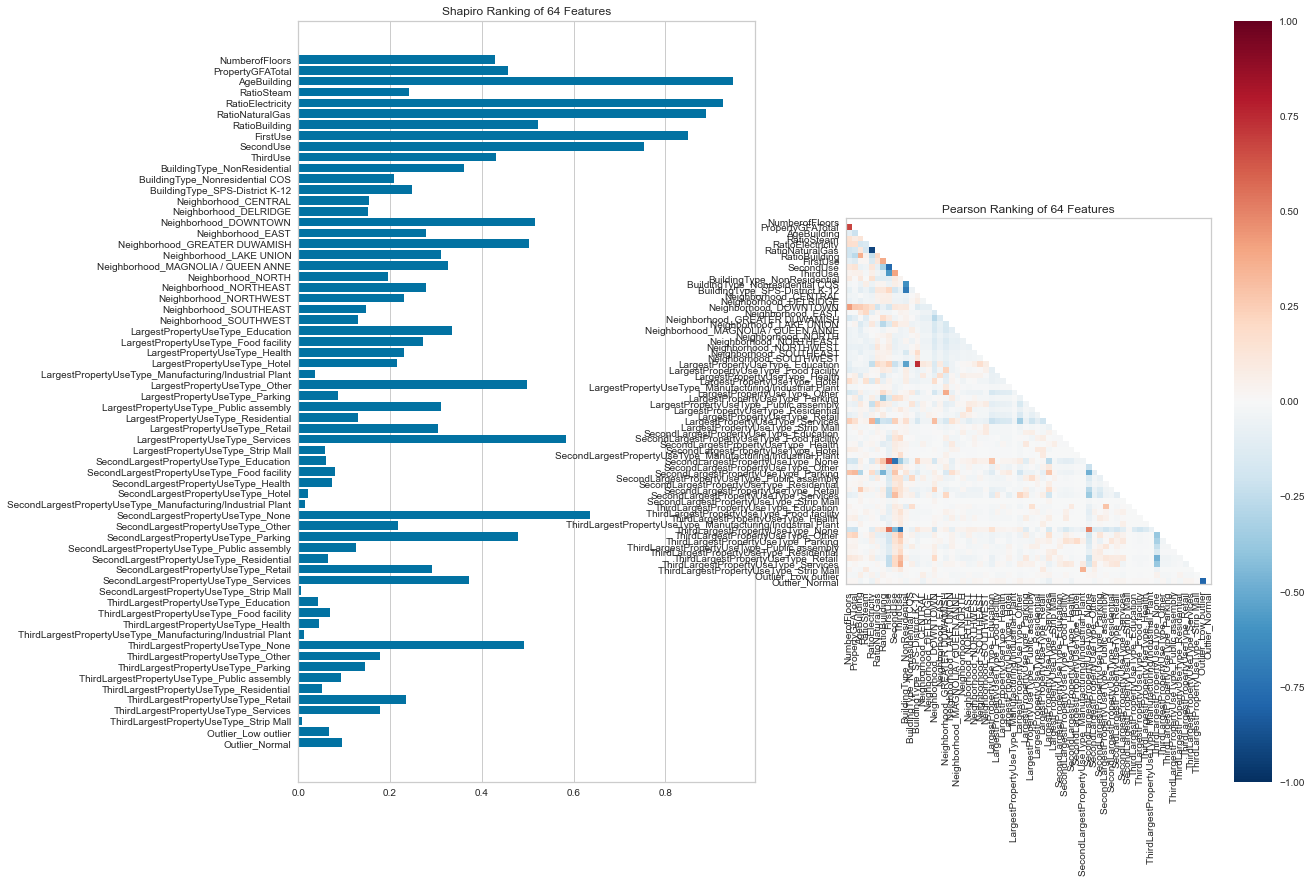

In [150]:
# Analyse des forces et corrélations des variables grâce à yellowbrick
fig, axes = plt.subplots(ncols=2, figsize=(18,14))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show();

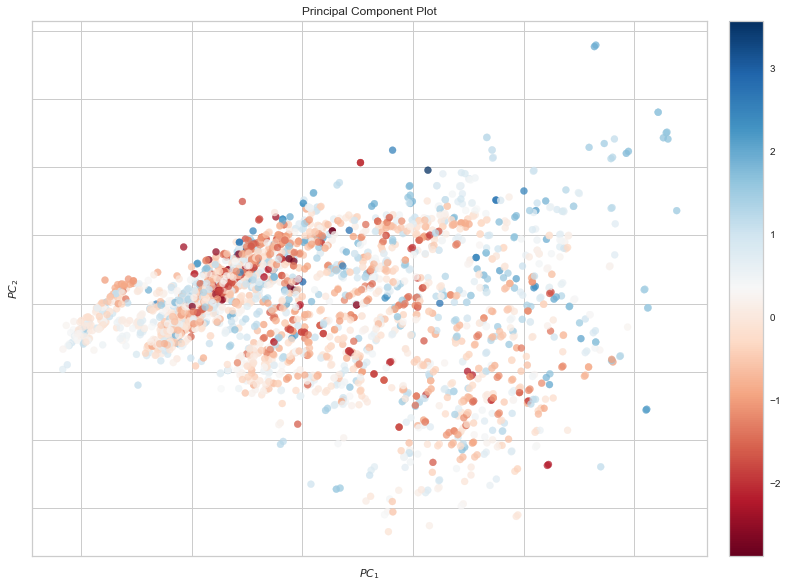

In [151]:
# PCA - biplot des individus et variables (yellobrick)
classes = [0, 1]
visualizer = PCA(scale=True, proj_features=False, classes=classes, size=(800, 600))
visualizer.fit_transform(X, y_emission_log)
visualizer.show();

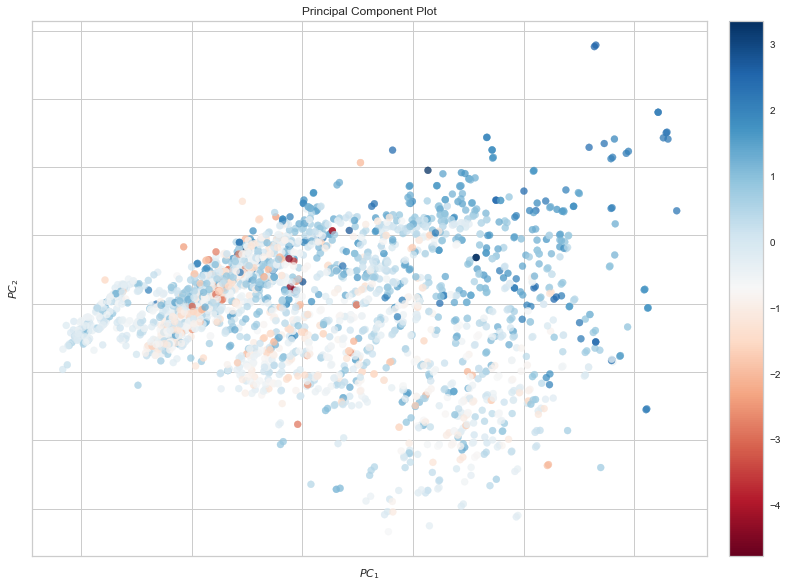

In [152]:
# PCA - biplot des individus et variables (yellobrick)
classes = [0, 1]
visualizer = PCA(scale=True, proj_features=False, classes=classes, size=(800, 600))
visualizer.fit_transform(X, y_energy_log)
visualizer.show();

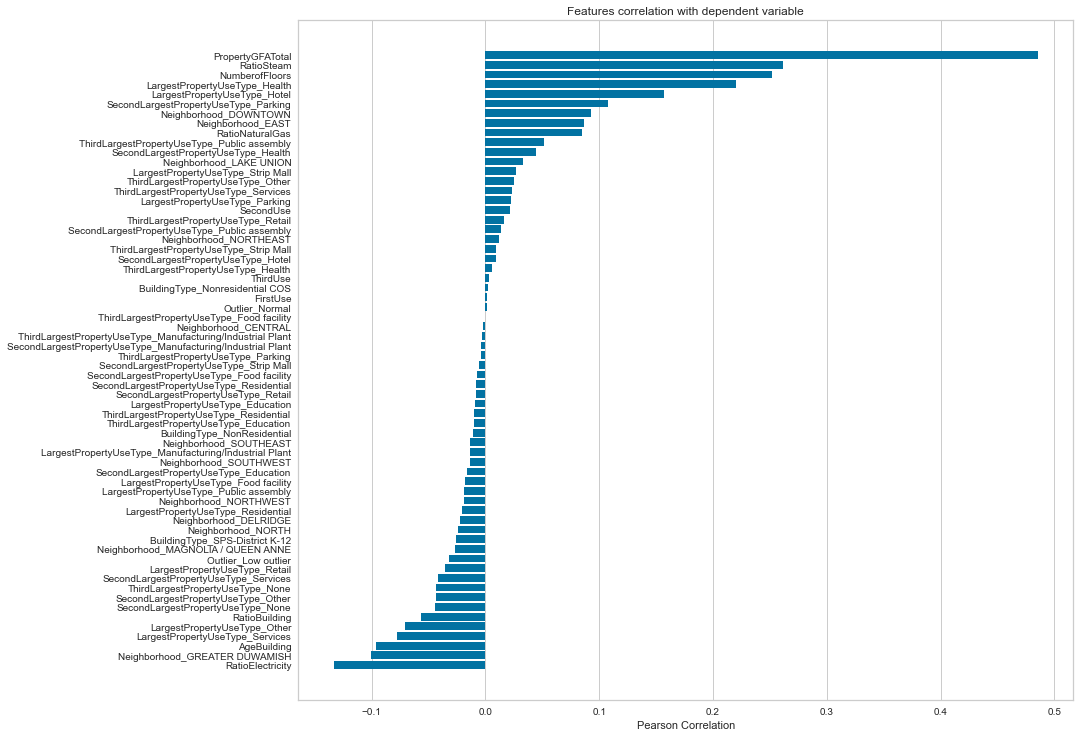

In [153]:
# Force des corrélations des variables par rapport à is_genuine
features = np.array(X.columns)
visualizer = FeatureCorrelation(labels=features, size=(1000, 900), sort=True)

visualizer.fit(X, y_emission)
visualizer.show();

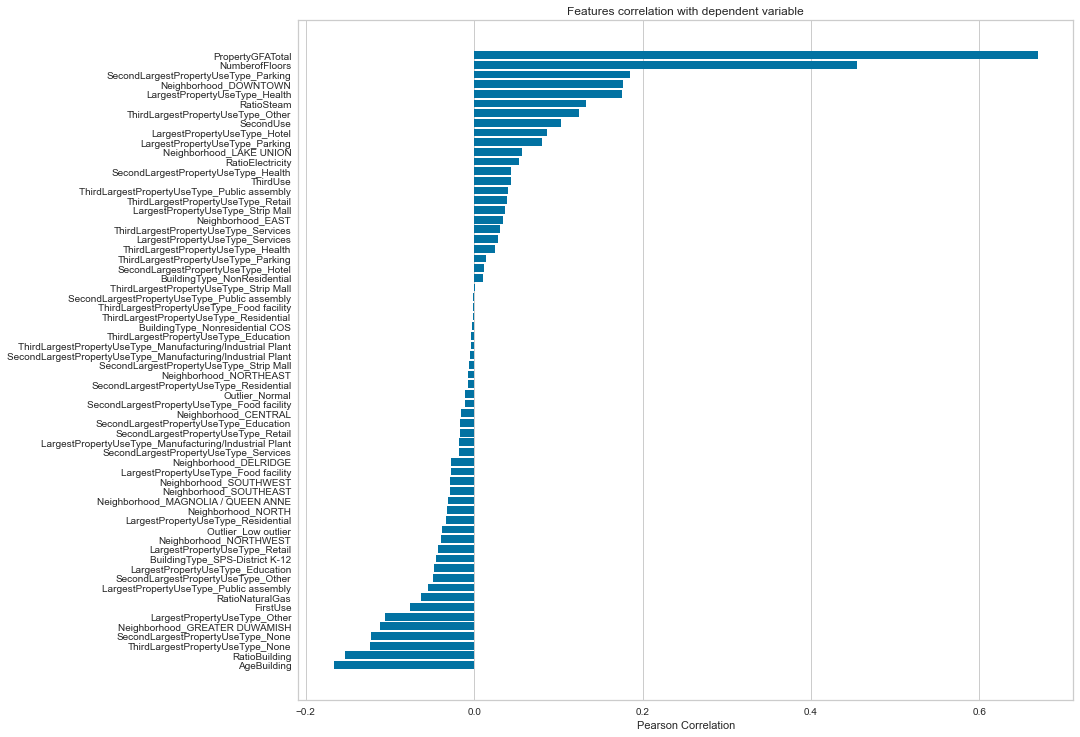

In [154]:
# Force des corrélations des variables par rapport à is_genuine
features = np.array(X.columns)
visualizer = FeatureCorrelation(labels=features, size=(1000, 900), sort=True)

visualizer.fit(X, y_energy)
visualizer.show();

In [317]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X, y_energy, random_state=42)
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X, y_emission, random_state=42)
X_train_en_log, X_test_en_log, y_train_en_log, y_test_en_log = train_test_split(X, y_energy_log, random_state=42)
X_train_em_log, X_test_em_log, y_train_em_log, y_test_em_log = train_test_split(X, y_emission_log, random_state=42)
X_train_en_log_nostd, X_test_en_log_nostd, y_train_en_log_nostd, y_test_en_log_nostd = train_test_split(X, y_energy_log_nostd, random_state=42)
X_train_em_log_nostd, X_test_em_log_nostd, y_train_em_log_nostd, y_test_em_log_nostd = train_test_split(X, y_emission_log_nostd, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### LazyRegressor

In [156]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_em, predictions = reg.fit(X_train_em, X_test_em, y_train_em, y_test_em)

100%|██████████| 42/42 [00:28<00:00,  1.45it/s]


In [157]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_em_log, predictions = reg.fit(X_train_em_log, X_test_em_log, y_train_em_log, y_test_em_log)

100%|██████████| 42/42 [00:27<00:00,  1.51it/s]


In [158]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_em_log_nostd, predictions = reg.fit(X_train_em_log_nostd, X_test_em_log_nostd, y_train_em_log_nostd, y_test_em_log_nostd)

100%|██████████| 42/42 [00:28<00:00,  1.49it/s]


In [159]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_en, predictions = reg.fit(X_train_en, X_test_en, y_train_en, y_test_en)

100%|██████████| 42/42 [00:29<00:00,  1.44it/s]


In [160]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_en_log, predictions = reg.fit(X_train_en_log, X_test_en_log, y_train_en_log, y_test_en_log)

100%|██████████| 42/42 [00:28<00:00,  1.48it/s]


In [161]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_en_log_nostd, predictions = reg.fit(X_train_en_log_nostd, X_test_en_log_nostd, y_train_en_log_nostd, y_test_en_log_nostd)

100%|██████████| 42/42 [00:27<00:00,  1.51it/s]


In [162]:
# LazyRegressor for energy
models_en_log_nostd.join(models_en_log, lsuffix="__log_nostd", rsuffix="_log").join(models_en).head()

,Adjusted R-Squared__log_nostd,R-Squared__log_nostd,RMSE__log_nostd,Time Taken__log_nostd,Adjusted R-Squared_log,R-Squared_log,RMSE_log,Time Taken_log,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,,,,,,,,,
ExtraTreesRegressor,0.87,0.88,0.28,2.97,0.87,0.88,0.35,2.87,0.87,0.88,3891509.44,2.97
XGBRegressor,0.82,0.84,0.32,0.92,0.82,0.84,0.40,1.09,0.85,0.86,4104249.18,0.80
RandomForestRegressor,0.81,0.83,0.33,2.81,0.81,0.83,0.42,3.35,0.80,0.82,4708293.66,3.78
LGBMRegressor,0.79,0.81,0.35,0.52,0.79,0.81,0.44,0.46,0.74,0.76,5451695.98,0.42
HistGradientBoostingRegressor,0.79,0.81,0.35,4.23,0.79,0.81,0.44,4.22,0.74,0.76,5448972.08,4.50


In [163]:
# LazyRegressor for emission
models_em_log_nostd.join(models_em_log, lsuffix="__log_nostd", rsuffix="_log").join(models_em).head()

,Adjusted R-Squared__log_nostd,R-Squared__log_nostd,RMSE__log_nostd,Time Taken__log_nostd,Adjusted R-Squared_log,R-Squared_log,RMSE_log,Time Taken_log,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,,,,,,,,,
ExtraTreesRegressor,0.88,0.89,0.33,3.23,0.88,0.89,0.33,2.65,0.80,0.82,96.55,2.84
XGBRegressor,0.85,0.87,0.36,0.78,0.85,0.87,0.36,0.90,0.80,0.82,97.31,1.21
LGBMRegressor,0.84,0.85,0.38,0.40,0.84,0.85,0.38,0.56,0.66,0.69,126.48,0.56
HistGradientBoostingRegressor,0.84,0.85,0.38,4.80,0.84,0.85,0.38,4.85,0.67,0.70,123.95,5.07
RandomForestRegressor,0.83,0.84,0.40,2.71,0.83,0.84,0.40,2.71,0.74,0.77,109.88,3.46


**Modèle ensembliste avec les meilleurs résultats.  
Standardisation ou normalisation non nécessaire.  
Utilsitation de la log_target qui donne les meilleurs résultats.**

##### Energy - ExtraTreesRegressor

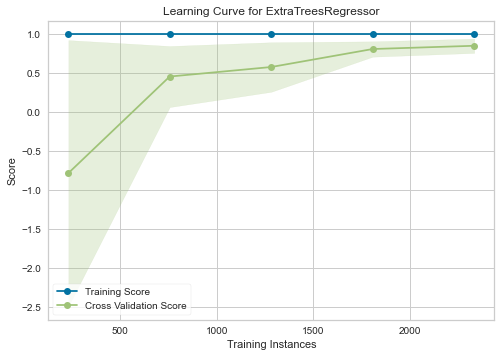

<AxesSubplot:title={'center':'Learning Curve for ExtraTreesRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [418]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(ExtraTreesRegressor(), scoring='r2')

visualizer.fit(X, y_energy)        # Fit the data to the visualizer
visualizer.show()

In [164]:
from sklearn.ensemble import ExtraTreesRegressor
# Hyperparamétrage manuel
reg_ETR_log = ExtraTreesRegressor(n_estimators=300, max_depth=26, max_features=32, n_jobs=-1).fit(X_train_en_log, y_train_en_log)
reg_ETR_log.score(X_test_en_log, y_test_en_log)

0.8878799720603647

In [165]:
param_grid = {
    "n_estimators": [250, 275, 300, 325],
    "max_depth": [24, 26, 28],
    "max_features": [28, 30, 32, 34]
}

In [166]:
from sklearn.model_selection import GridSearchCV
# Hyperparamétrage Grid
reg_ETR_log = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv= 5)
reg_ETR_log.fit(X_train_en_log, y_train_en_log)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [24, 26, 28],
                         'max_features': [28, 30, 32, 34],
                         'n_estimators': [250, 275, 300, 325]})

In [167]:
best_params_ETR_en = reg_ETR_log.best_params_
best_params_ETR_en

{'max_depth': 28, 'max_features': 34, 'n_estimators': 325}

In [168]:
reg_ETR_log_final = ExtraTreesRegressor(**best_params_ETR_en).fit(X_train_en_log, y_train_en_log)
reg_ETR_log_final.score(X_test_en_log, y_test_en_log)

0.8865835590627753

In [221]:
reg_ETR_log_final.score(X_train_en_log, y_train_en_log)

0.9997927666319832

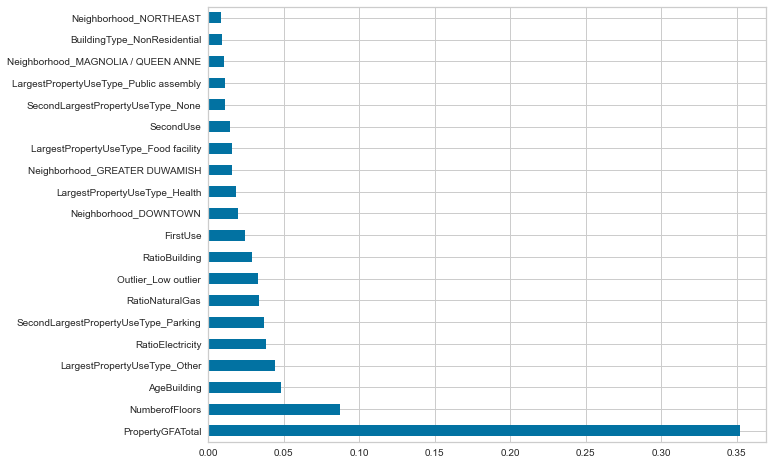

In [169]:
feat_importances = pd.Series(reg_ETR_log_final.feature_importances_, index=X_train_en_log.columns)
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

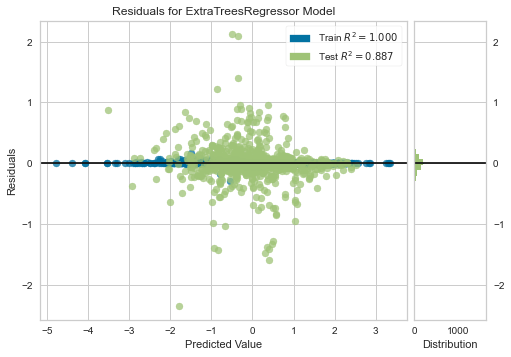

In [422]:
visualizer = ResidualsPlot(reg_ETR_log_final)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

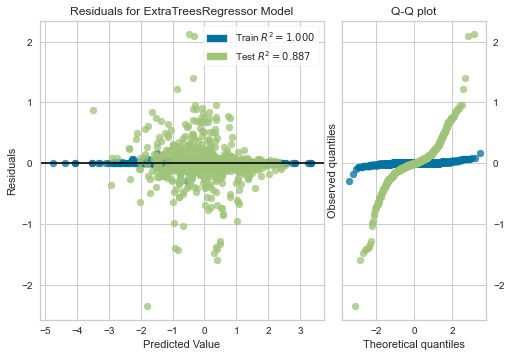

In [423]:
visualizer = ResidualsPlot(reg_ETR_log_final, hist=False, qqplot=True)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show();

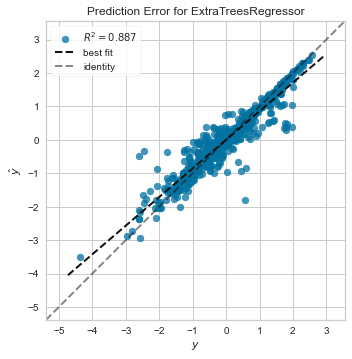

In [424]:
visualizer = PredictionError(reg_ETR_log_final)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show(); 

##### Energy - XGBRegressor

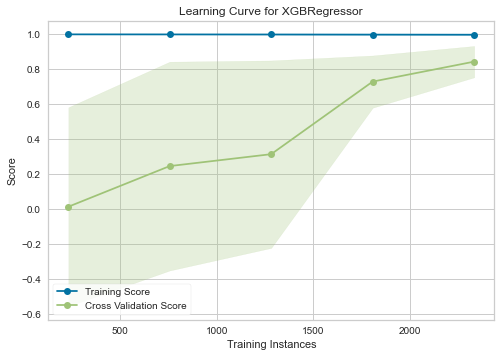

<AxesSubplot:title={'center':'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [417]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(XGBRegressor(), scoring='r2')

visualizer.fit(X, y_energy)        # Fit the data to the visualizer
visualizer.show()

In [329]:
from xgboost import XGBRegressor

# Hyperparamétrage manuel
reg_XGB_log = XGBRegressor(seed=42, n_estimators=1000, max_depth=7, eta=0.25).fit(
    X_train_en_log,
    y_train_en_log,
    eval_set=[(X_train_en_log, y_train_en_log), (X_test_en_log, y_test_en_log)],
    early_stopping_rounds=50,
    verbose=False,
)

test_score = reg_XGB_log.score(X_test_en_log, y_test_en_log)
train_score = reg_XGB_log.score(X_train_en_log, y_train_en_log)
RMSE = reg_XGB_log.best_score
tree = reg_XGB_log.best_ntree_limit

print(f"Test score: {test_score:.4f} - Train score: {train_score:.4f}")
print(f"RMSE: {RMSE:.4f} - Best ntree:{tree}")

Test score: 0.8590 - Train score: 1.0000
RMSE: 0.3765 - Best ntree:467


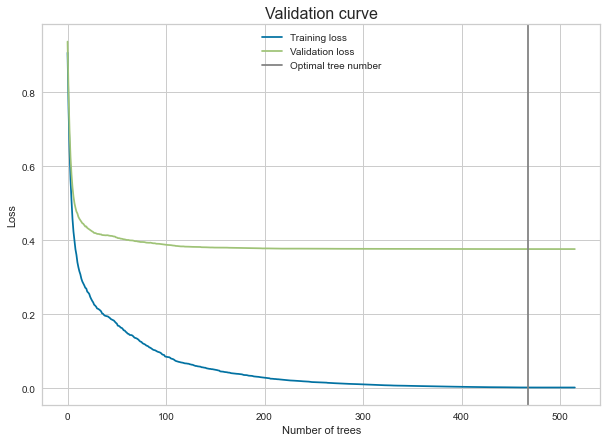

In [409]:
results = reg_XGB_log.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(tree, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation curve", fontsize=16)
plt.show();

In [310]:
param_grid = {
   "max_depth": [6, 7, 8],
    "n_estimators": [440, 460, 480],
    "eta": [0.24, 0.25, 0.26], # learning rate
}

In [311]:
reg_XGB_log = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv= 5)
reg_XGB_log.fit(X_train_en_log, y_train_en_log)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [312]:
best_params_XGB_en = reg_XGB_log.best_params_
best_params_XGB_en

{'eta': 0.29, 'max_depth': 8, 'n_estimators': 460}

In [411]:
reg_XGB_log_final = XGBRegressor(**best_params_XGB_en).fit(X_train_en_log, y_train_en_log)
reg_XGB_log_final.score(X_test_en_log, y_test_en_log)

0.8517632985833582

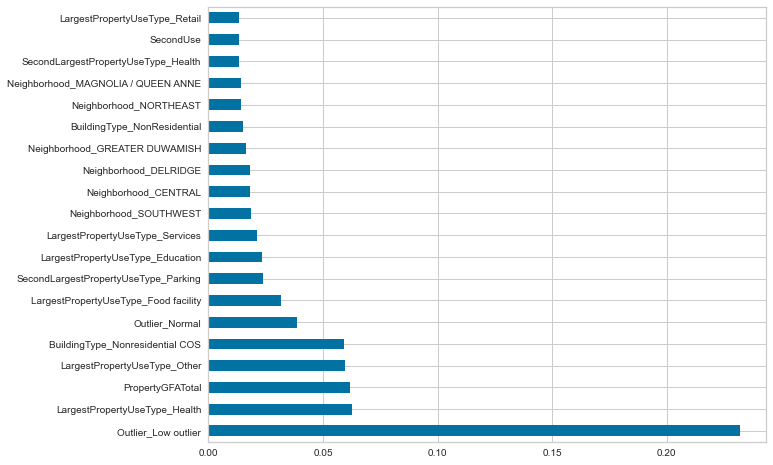

In [319]:
feat_importances = pd.Series(reg_XGB_log_final.feature_importances_, index=X_train_en_log.columns)
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

In [ ]:
from yellowbrick.regressor import ResidualsPlot

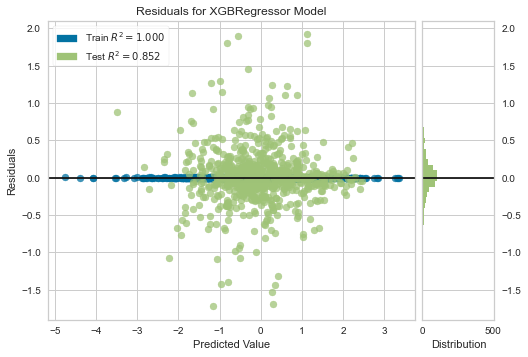

In [412]:
visualizer = ResidualsPlot(reg_XGB_log_final)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

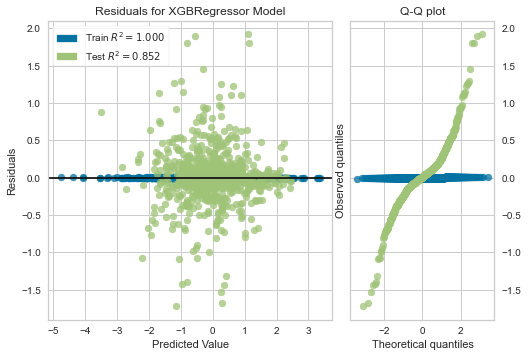

In [413]:
visualizer = ResidualsPlot(reg_XGB_log_final, hist=False, qqplot=True)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show();    

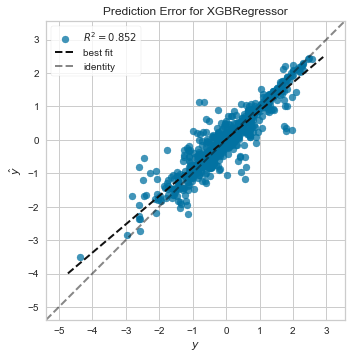

In [414]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg_XGB_log_final)

visualizer.fit(X_train_en_log, y_train_en_log)  # Fit the training data to the visualizer
visualizer.score(X_test_en_log, y_test_en_log)  # Evaluate the model on the test data
visualizer.show(); 

##### Emission - ExtraTreesRegressor

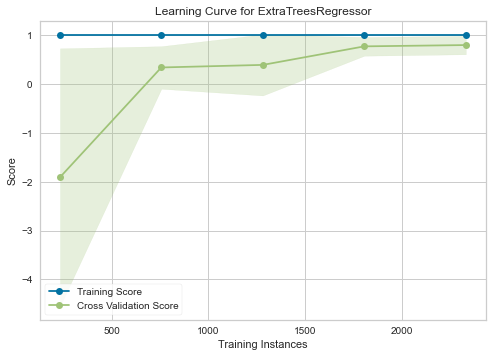

<AxesSubplot:title={'center':'Learning Curve for ExtraTreesRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [419]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(ExtraTreesRegressor(), scoring='r2')

visualizer.fit(X, y_emission)        # Fit the data to the visualizer
visualizer.show()

In [176]:
# Hyperparamétrage manuel ("biasé" par le random_state)
reg_ETR_em_log = ExtraTreesRegressor(n_estimators=255, max_depth=24, max_features=19, random_state=42).fit(X_train_em_log, y_train_em_log)
reg_ETR_em_log.score(X_test_em_log, y_test_em_log)

0.8966590318780882

In [177]:
param_grid = {
    "n_estimators": [245, 250, 255],
    "max_depth": [22, 24, 26],
    "max_features": [17, 19, 21]
}

In [178]:
# Hyperparamétrage Grid
reg_ETR_em_log = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv= 5)
reg_ETR_em_log.fit(X_train_em_log, y_train_em_log)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [22, 24, 26],
                         'max_features': [17, 19, 21],
                         'n_estimators': [245, 250, 255]})

In [179]:
best_params_ETR_em = reg_ETR_em_log.best_params_
best_params_ETR_em

{'max_depth': 24, 'max_features': 21, 'n_estimators': 250}

In [180]:
reg_ETR_em_log_final = ExtraTreesRegressor(**best_params_ETR_em).fit(X_train_em_log, y_train_em_log)
reg_ETR_em_log_final.score(X_test_em_log, y_test_em_log)

0.8971309374931136

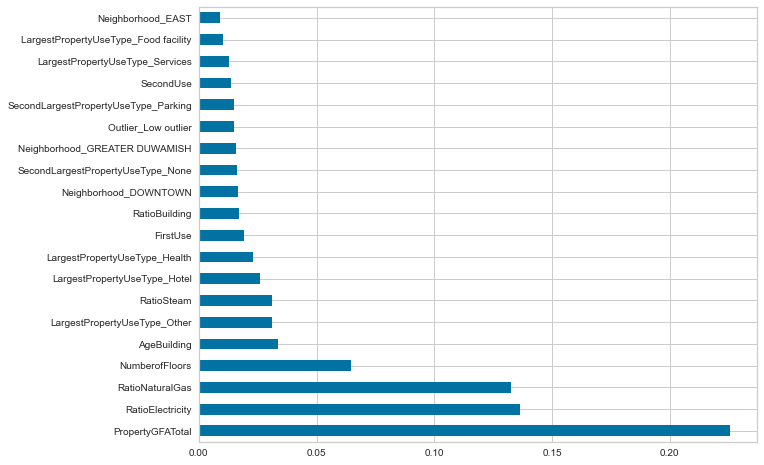

In [181]:
feat_importances = pd.Series(reg_ETR_em_log_final.feature_importances_, index=X_train_em_log.columns)
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

##### Emission - XGBRegressor

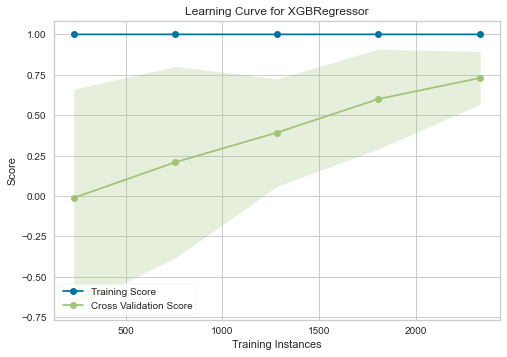

<AxesSubplot:title={'center':'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [421]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    XGBRegressor(
        seed=42,
        n_estimators=1000,
        max_depth=5,
        eta=0.2,
        colsample_bytree=0.79,
        subsample=0.9,
        reg_alpha=0.05,
    ),
    scoring="r2",
)

visualizer.fit(X, y_emission)  # Fit the data to the visualizer
visualizer.show()

In [377]:
# Hyperparamétrage manuel
# reg_XGB_em_log = XGBRegressor(max_depth=6, min_child_weight=3, eta=0.30, seed=42).fit(X_train_em_log, y_train_em_log)
# reg_XGB_em_log.score(X_test_em_log, y_test_em_log)
from xgboost import XGBRegressor

# Hyperparamétrage manuel
reg_XGB_log_em = XGBRegressor(
    seed=42,
    n_estimators=1000,
    max_depth=5,
    eta=0.2,
    colsample_bytree=0.79,
    subsample=0.9,
    reg_alpha=0.05
).fit(
    X_train_em_log,
    y_train_em_log,
    eval_set=[(X_train_em_log, y_train_em_log), (X_test_em_log, y_test_em_log)],
    early_stopping_rounds=50,
    verbose=False,
)

test_score_em = reg_XGB_log_em.score(X_test_em_log, y_test_em_log)
train_score_em = reg_XGB_log_em.score(X_train_em_log, y_train_em_log)
RMSE_em = reg_XGB_log_em.best_score
tree_em = reg_XGB_log_em.best_ntree_limit

print(f"Test score: {test_score_em:.4f} - Train score: {train_score_em:.4f}")
print(f"RMSE: {RMSE_em:.4f} - Best ntree:{tree_em}")

Test score: 0.8937 - Train score: 0.9998
RMSE: 0.3241 - Best ntree:755


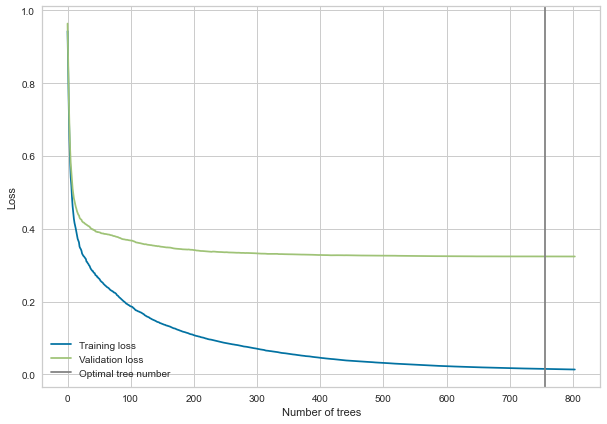

In [365]:
results_em = reg_XGB_log_em.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results_em["validation_0"]["rmse"], label="Training loss")
plt.plot(results_em["validation_1"]["rmse"], label="Validation loss")
plt.axvline(tree_em, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [183]:
param_grid = {
   "max_depth": [5, 6, 7],
    "n_estimators": []
    "eta": [0.19, 0.2, 0.21],
    "colsample_bytree": [0.78, 0.79, 0.8],
    "subsample": [0.89, 0.9, 0.91],
    "reg_alpha": [0.4, 0.05, 0.06]
}

In [184]:
reg_XGB_em_log = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv= 5)
reg_XGB_em_log.fit(X_train_em_log, y_train_em_log)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [185]:
best_params_XGB_em = reg_XGB_em_log.best_params_
best_params_XGB_em

{'eta': 0.28, 'max_depth': 7, 'min_child_weight': 4}

In [186]:
reg_XGB_em_log_final = XGBRegressor(**best_params_XGB_em).fit(X_train_em_log, y_train_em_log)
reg_XGB_em_log_final.score(X_test_em_log, y_test_em_log)

0.8656201173125548

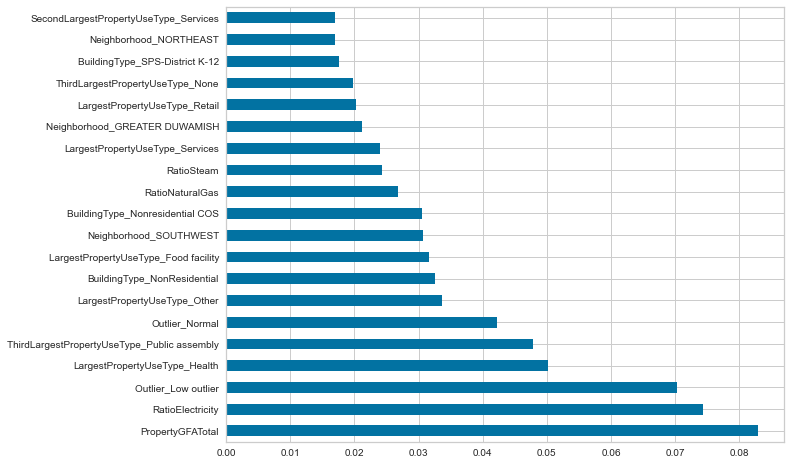

In [187]:
feat_importances = pd.Series(reg_XGB_em_log_final.feature_importances_, index=X_train_em_log.columns)
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show();

### PCA puis modeling

In [188]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [189]:
X_scaled.shape

(2915, 64)

In [190]:
# Initialisation de la PCA avec explication de la variance à 90%
from sklearn import decomposition
pca = decomposition.PCA(n_components=0.9)
df_pca = pca.fit_transform(X_scaled)

In [191]:
pca.explained_variance_ratio_.cumsum()

array([0.16749542, 0.26405479, 0.33141287, 0.39628515, 0.44534479,
       0.4859043 , 0.52424926, 0.55971819, 0.5924851 , 0.62124791,
       0.64638556, 0.67074908, 0.69391954, 0.71590511, 0.73665844,
       0.7554276 , 0.7732676 , 0.78994121, 0.80585944, 0.82007175,
       0.83392564, 0.84735966, 0.85881878, 0.869518  , 0.87924841,
       0.88890489, 0.8977593 , 0.90611239])

In [192]:
X_train_en_pca, X_test_en_pca, y_train_en_pca, y_test_en_pca = train_test_split(X_scaled, y_energy_log, random_state=42)
X_train_em_pca, X_test_em_pca, y_train_em_pca, y_test_em_pca = train_test_split(X_scaled, y_emission_log, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_en_pca, predictions = reg.fit(X_train_en_pca, X_test_en_pca, y_train_en_pca, y_test_en_pca)
models_en_pca.head()

100%|██████████| 42/42 [00:29<00:00,  1.41it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.88,0.35,2.83
XGBRegressor,0.82,0.84,0.40,0.77
RandomForestRegressor,0.81,0.83,0.42,2.93
LGBMRegressor,0.79,0.81,0.44,0.54
HistGradientBoostingRegressor,0.79,0.81,0.44,4.74


In [194]:
reg = LazyRegressor(ignore_warnings=True, custom_metric=None, predictions=True)
models_em_pca, predictions = reg.fit(X_train_em_pca, X_test_em_pca, y_train_em_pca, y_test_em_pca)
models_em_pca.head()

100%|██████████| 42/42 [00:30<00:00,  1.36it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.88,0.89,0.33,3.18
XGBRegressor,0.85,0.87,0.36,0.93
LGBMRegressor,0.84,0.85,0.38,0.47
HistGradientBoostingRegressor,0.84,0.85,0.38,4.60
RandomForestRegressor,0.83,0.84,0.40,2.72


Pas de meilleurs résultats

### Vérification des prédictions

##### Energy

In [461]:
energy_pred_log = reg_XGB_log_final.predict(X_test_en_log)

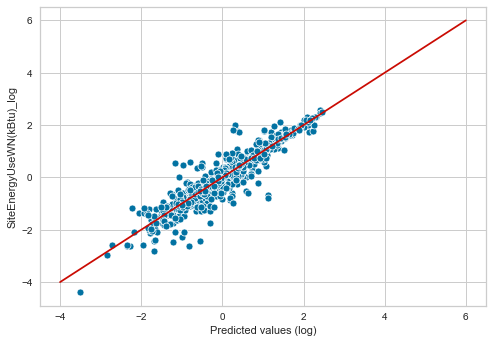

In [462]:
# pt_nostd_en PowerTransformer used
sns.scatterplot(energy_pred_log, y_test_en_log)
plt.xlabel("Predicted values (log)")
plt.plot([-4, 6], [-4, 6], 'r')

In [463]:
energy_pred = pt_std_en.inverse_transform(energy_pred_log.reshape(-1,1))[:,0]

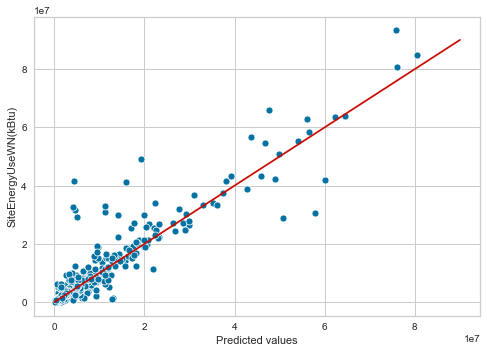

In [464]:
fig, ax = plt.subplots()
sns.scatterplot(energy_pred, y_test_en)
plt.xlabel("Predicted values")
plt.plot([0, 9e7], [0, 9e7], 'r')


In [465]:
pd.DataFrame(abs(energy_pred - y_test_en)).describe()

,SiteEnergyUseWN(kBtu)
count,729.00
mean,1593584.77
std,3668430.91
min,780.25
25%,178753.38
50%,492206.50
75%,1365722.00
max,37306260.00


In [466]:
reg_XGB_log_final.predict(X_test_en_log) - y_test_en_log

73     -0.27
478    -0.43
1607   -0.04
1057    0.27
237     0.58
        ... 
963    -0.15
390     0.10
542    -0.45
2808   -0.36
330    -0.68
Name: SiteEnergyUseWN(kBtu)_log, Length: 729, dtype: float64

In [458]:
reg_ETR_log_final.predict(X_test_en_log)

array([ 0.08475756,  0.46630356, -0.28417434, -0.96038115,  0.21965372,
        1.98532454,  0.3922939 ,  0.54257915,  0.824972  , -0.81329121,
        0.79320665, -0.38629835,  2.52687426,  0.0488603 ,  0.20658549,
       -0.13246828,  0.47832003, -1.19167499, -0.48291512, -0.76888212,
        0.30416053, -0.1331206 , -0.37334543,  0.82441766, -0.62096974,
       -0.12725708, -0.58888065, -1.28783   ,  2.07127336, -0.39237094,
       -0.0709932 , -0.21762011, -0.32999159, -0.6890893 ,  0.76004222,
        0.44993596, -0.743842  ,  0.36833919,  0.77458751, -0.72195733,
       -1.070039  , -0.94371963,  0.49600828, -0.41027347,  0.70441996,
       -0.97137184,  1.39097744, -0.3214054 , -0.19024953, -1.18826585,
       -0.67847125, -1.25094526,  1.33658958,  0.55951886,  0.39528188,
       -0.13676619, -0.82747678, -1.87766737, -0.25218013,  0.32577588,
        0.66433252, -0.38802374,  0.77675956, -0.09635177, -0.13390122,
        0.53866959,  1.67536491,  0.39735419,  0.61126896, -0.05

In [459]:
y_test_en_log

73     -0.08
478     0.72
1607   -0.15
1057   -1.10
237    -0.00
        ... 
963    -0.09
390    -0.52
542     1.35
2808   -1.14
330     2.10
Name: SiteEnergyUseWN(kBtu)_log, Length: 729, dtype: float64

In [460]:
reg_XGB_log_final.predict(X_test_en_log)

array([-0.35417664,  0.2921766 , -0.1876427 , -0.82666945,  0.5745409 ,
        1.9198365 ,  0.3933034 ,  0.54507846,  0.84956926, -0.49305397,
        0.6898007 , -0.48622245,  2.4138691 , -0.1652062 ,  0.2852869 ,
       -0.05026501,  0.43418425, -1.4747897 , -0.50452137, -0.79336345,
        0.35579604, -0.13670498, -0.21235925,  0.79725206, -0.6619657 ,
       -0.05373502, -0.5940362 , -1.2159863 ,  2.0548902 , -0.38007492,
        0.04292035, -0.29755288, -0.4689867 , -0.48273253,  0.5498946 ,
        0.5126684 , -0.7395171 ,  0.24185312,  0.75010234, -0.697538  ,
       -1.0808668 , -0.76228654,  0.512571  , -0.2943992 ,  0.72698545,
       -1.065357  ,  1.3145933 , -0.45543236,  0.02473086, -1.2760532 ,
       -0.6042583 , -1.2694956 ,  1.4705458 ,  0.36581004,  0.3009867 ,
       -0.0771994 , -0.94880307, -1.6912918 , -0.07623726,  0.48370606,
        0.6534654 , -0.41937894,  0.89315724, -0.87579405, -0.22772527,
        0.3973601 ,  1.6878356 ,  0.3338237 ,  0.5379131 , -0.09

In [474]:
y_test_en

73      2682242.75
478     7589347.50
1607    2448649.75
1057     752188.00
237     2970604.25
           ...    
963     2641681.75
390     1536998.25
542    17384564.00
2808     714503.00
330    49102164.00
Name: SiteEnergyUseWN(kBtu), Length: 729, dtype: float64

In [570]:
index_test = 542

In [571]:
df[df.index == index_test]

,BuildingType,Neighborhood,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEnergyUseWN(kBtu),Outlier,TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd,TotalGHGEmissions_log,TotalGHGEmissions_log_nostd,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse
542,NonResidential,GREATER DUWAMISH,1.00,111908,Food facility,None,None,2481115.00,Normal,44.06,-0.13,11.77,-0.08,-0.08,28,0.00,0.66,0.25,1.00,0.97,0.00,0.00
542,NonResidential,NORTHWEST,1.00,141890,Food facility,Parking,Parking,17384564.00,Normal,293.56,1.39,12.95,1.21,1.21,46,0.00,0.75,0.22,0.75,1.19,0.00,0.00


In [572]:
X.loc[index_test]

,NumberofFloors,PropertyGFATotal,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Education,LargestPropertyUseType_Food facility,LargestPropertyUseType_Health,LargestPropertyUseType_Hotel,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Public assembly,LargestPropertyUseType_Residential,LargestPropertyUseType_Retail,LargestPropertyUseType_Services,LargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Education,SecondLargestPropertyUseType_Food facility,SecondLargestPropertyUseType_Health,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_None,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Public assembly,SecondLargestPropertyUseType_Residential,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_Services,SecondLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Food facility,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Public assembly,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_Services,ThirdLargestPropertyUseType_Strip Mall,Outlier_Low outlier,Outlier_Normal
542,1.00,111908,28,0.00,0.66,0.25,1.00,0.97,0.00,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
542,1.00,141890,46,0.00,0.75,0.22,0.75,1.19,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [573]:
# Pourquoi 2 index ???? 2 années ???
df2.loc[index_test]

,NumberofFloors,PropertyGFATotal,SiteEnergyUseWN(kBtu),TotalGHGEmissions,SiteEnergyUseWN(kBtu)_log,SiteEnergyUseWN(kBtu)_log_nostd,TotalGHGEmissions_log,TotalGHGEmissions_log_nostd,AgeBuilding,RatioSteam,RatioElectricity,RatioNaturalGas,RatioBuilding,FirstUse,SecondUse,ThirdUse,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Education,LargestPropertyUseType_Food facility,LargestPropertyUseType_Health,LargestPropertyUseType_Hotel,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Public assembly,LargestPropertyUseType_Residential,LargestPropertyUseType_Retail,LargestPropertyUseType_Services,LargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Education,SecondLargestPropertyUseType_Food facility,SecondLargestPropertyUseType_Health,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_None,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Public assembly,SecondLargestPropertyUseType_Residential,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_Services,SecondLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Food facility,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Public assembly,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_Services,ThirdLargestPropertyUseType_Strip Mall,Outlier_Low outlier,Outlier_Normal
542,1.00,111908,2481115.00,44.06,-0.14,11.77,-0.08,-0.08,28,0.00,0.66,0.25,1.00,0.97,0.00,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
542,1.00,141890,17384564.00,293.56,1.35,12.95,1.21,1.21,46,0.00,0.75,0.22,0.75,1.19,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [574]:
test_energy_log = reg_ETR_log_final.predict(X.loc[index_test])
test_energy_log

array([-0.38367988,  0.78843485])

In [575]:
pt_std_en.inverse_transform(test_energy_log.reshape(-1,1))[:,0]

array([1794274.84097168, 7976191.96053139])

In [576]:
test_emission_log = reg_ETR_em_log.predict(X.loc[index_test])
test_emission_log

array([-0.12266024,  0.74488022])

In [577]:
pt_std_em.inverse_transform(test_emission_log.reshape(-1,1))[:,0]

array([ 41.68917287, 146.90027323])